The goal here is to get songs that were popular in different time intervals and:

1. check what feature was most correlated with popularity at that interval

2. given the popularity of a song, if the features that correlate with it correlate with the year, if a popular song is given, can we predict the year it was released given the features that make it popular

3. see if over time there was an increase for example, if there was an increase in danceability over time in the popular songs or if it remained the same throughout the years.

Here a popular song is defined as having a score greater than 50

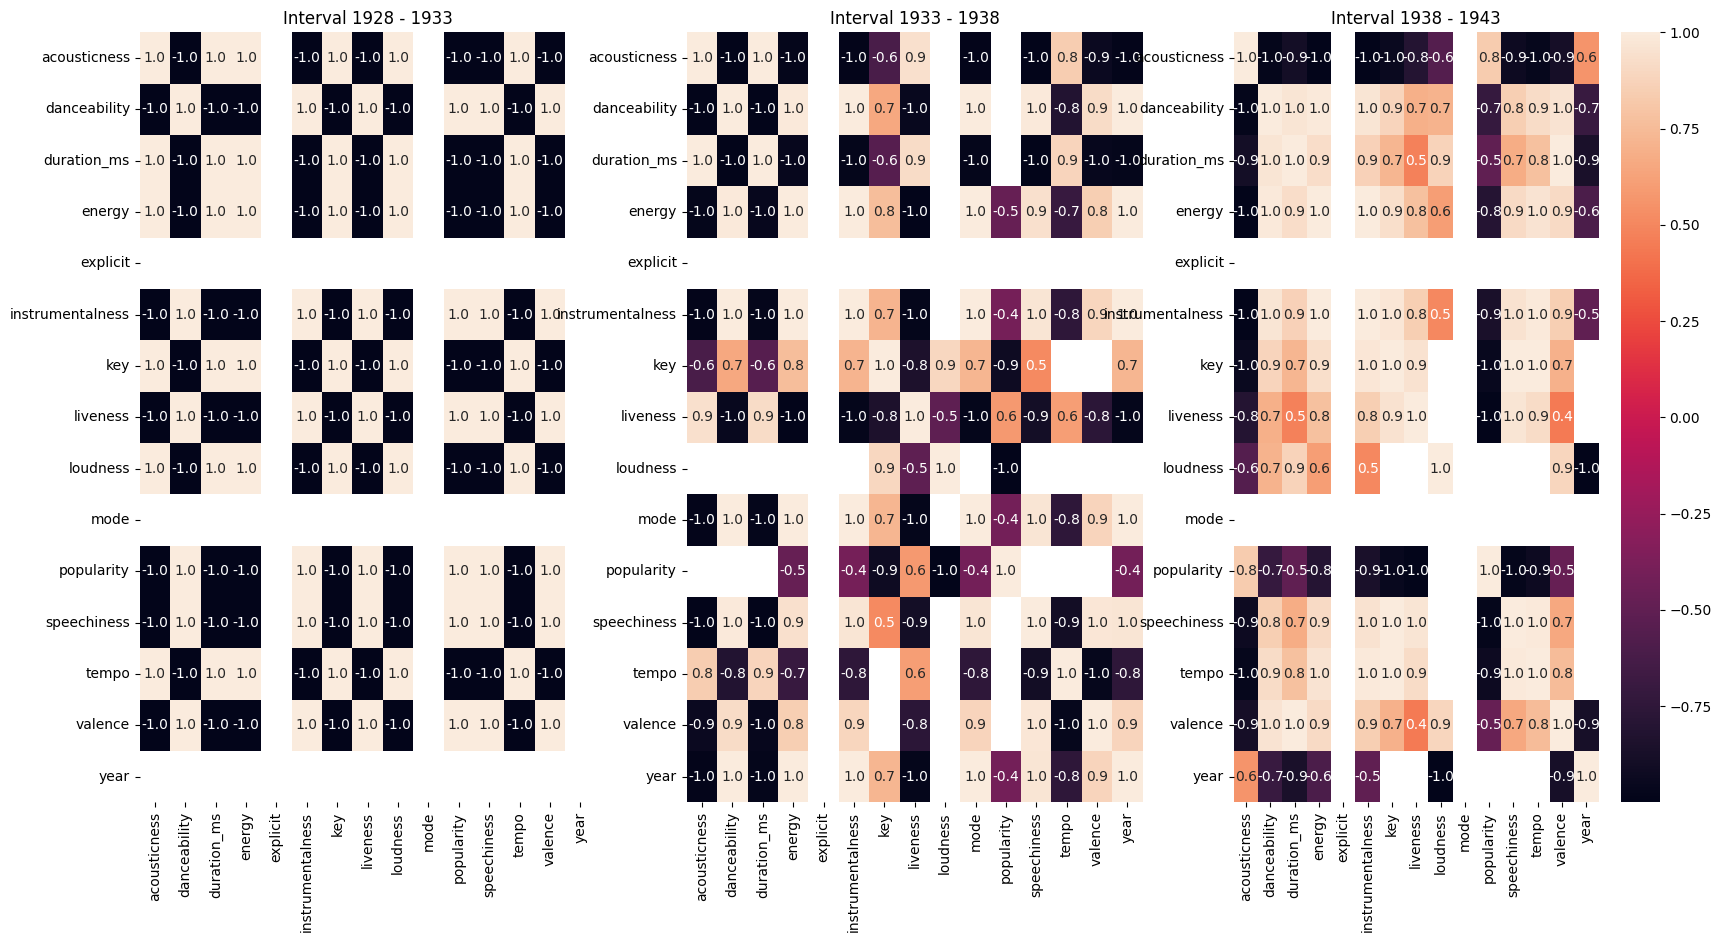

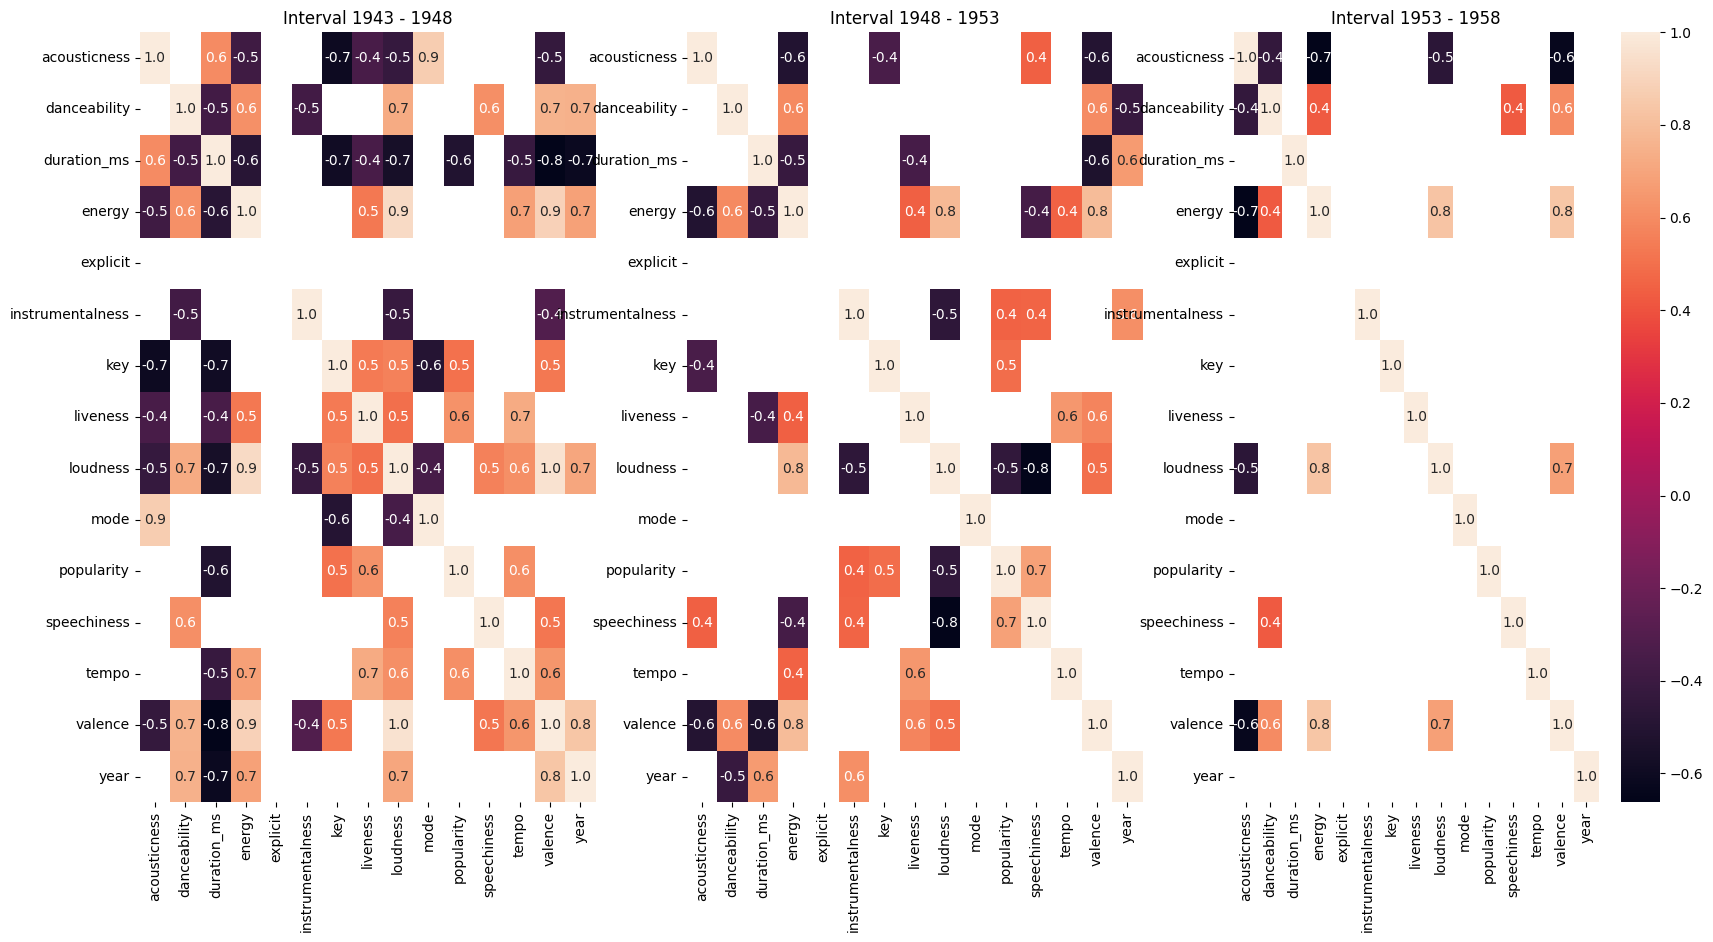

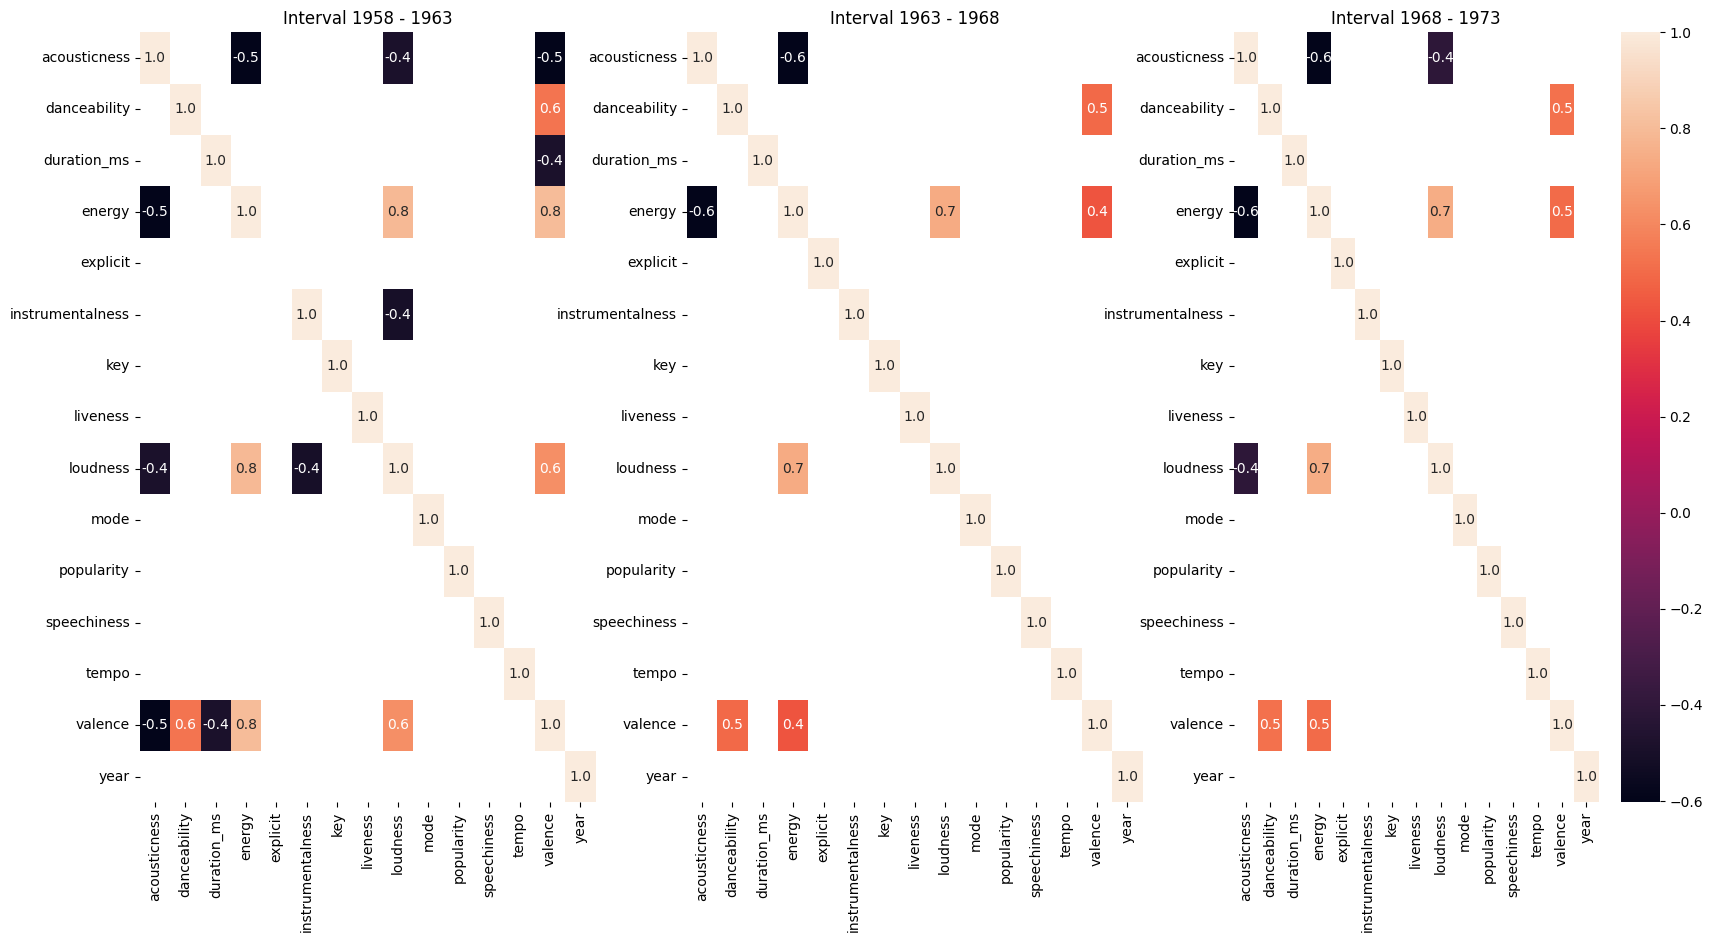

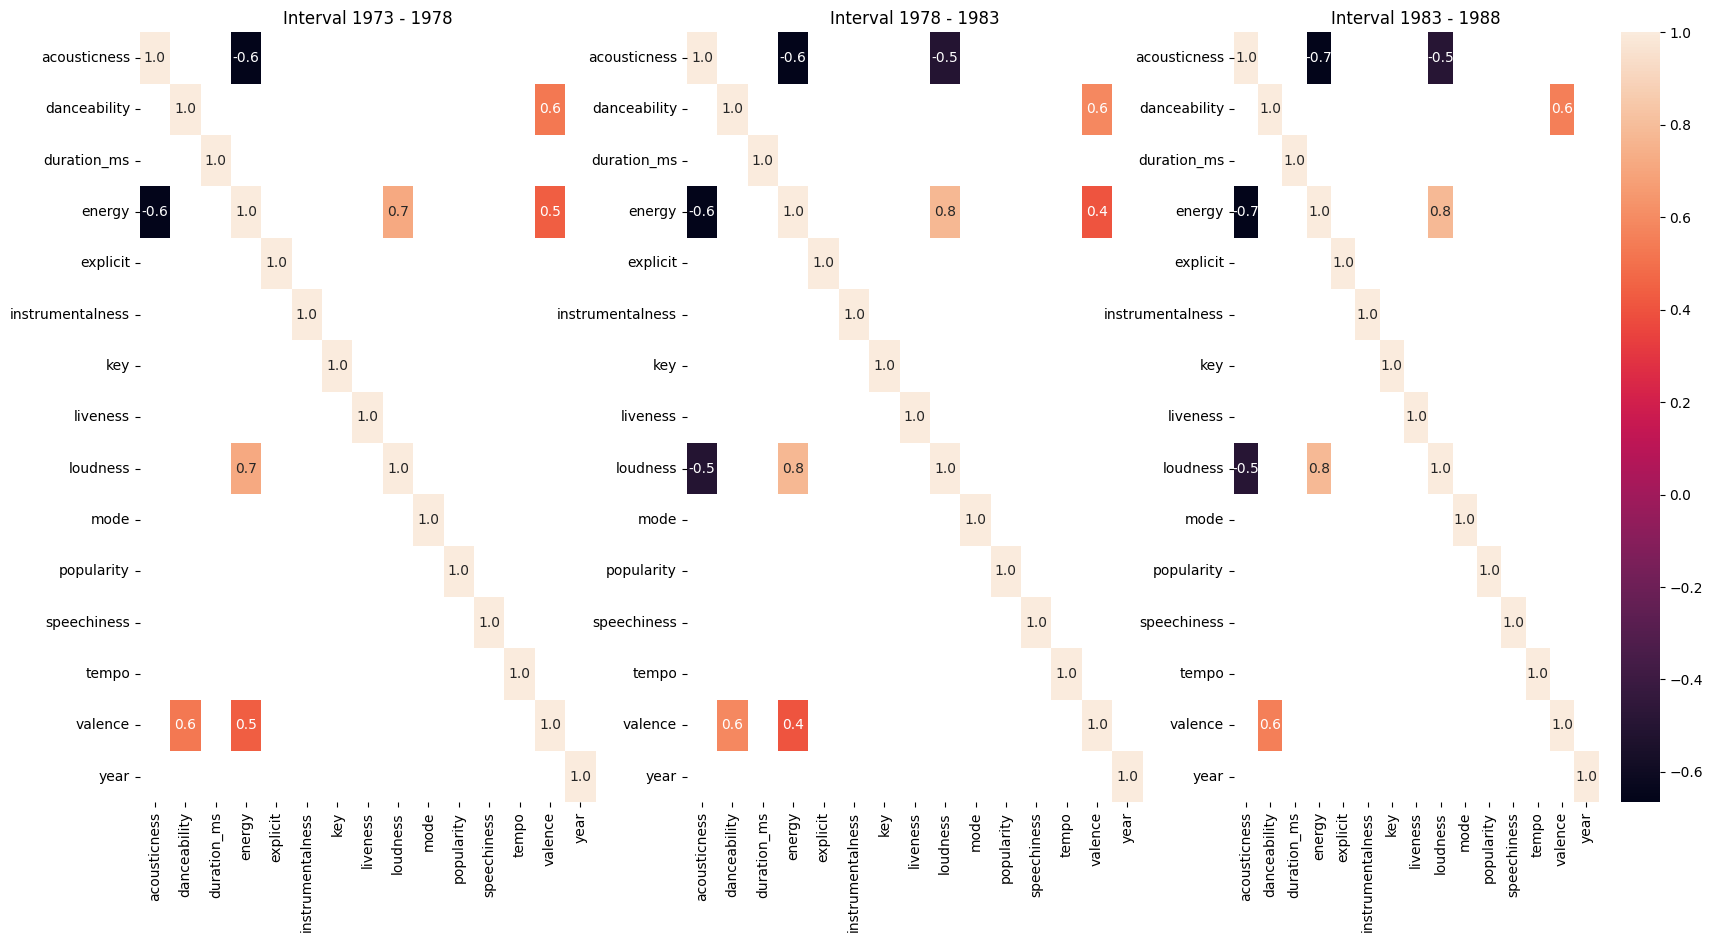

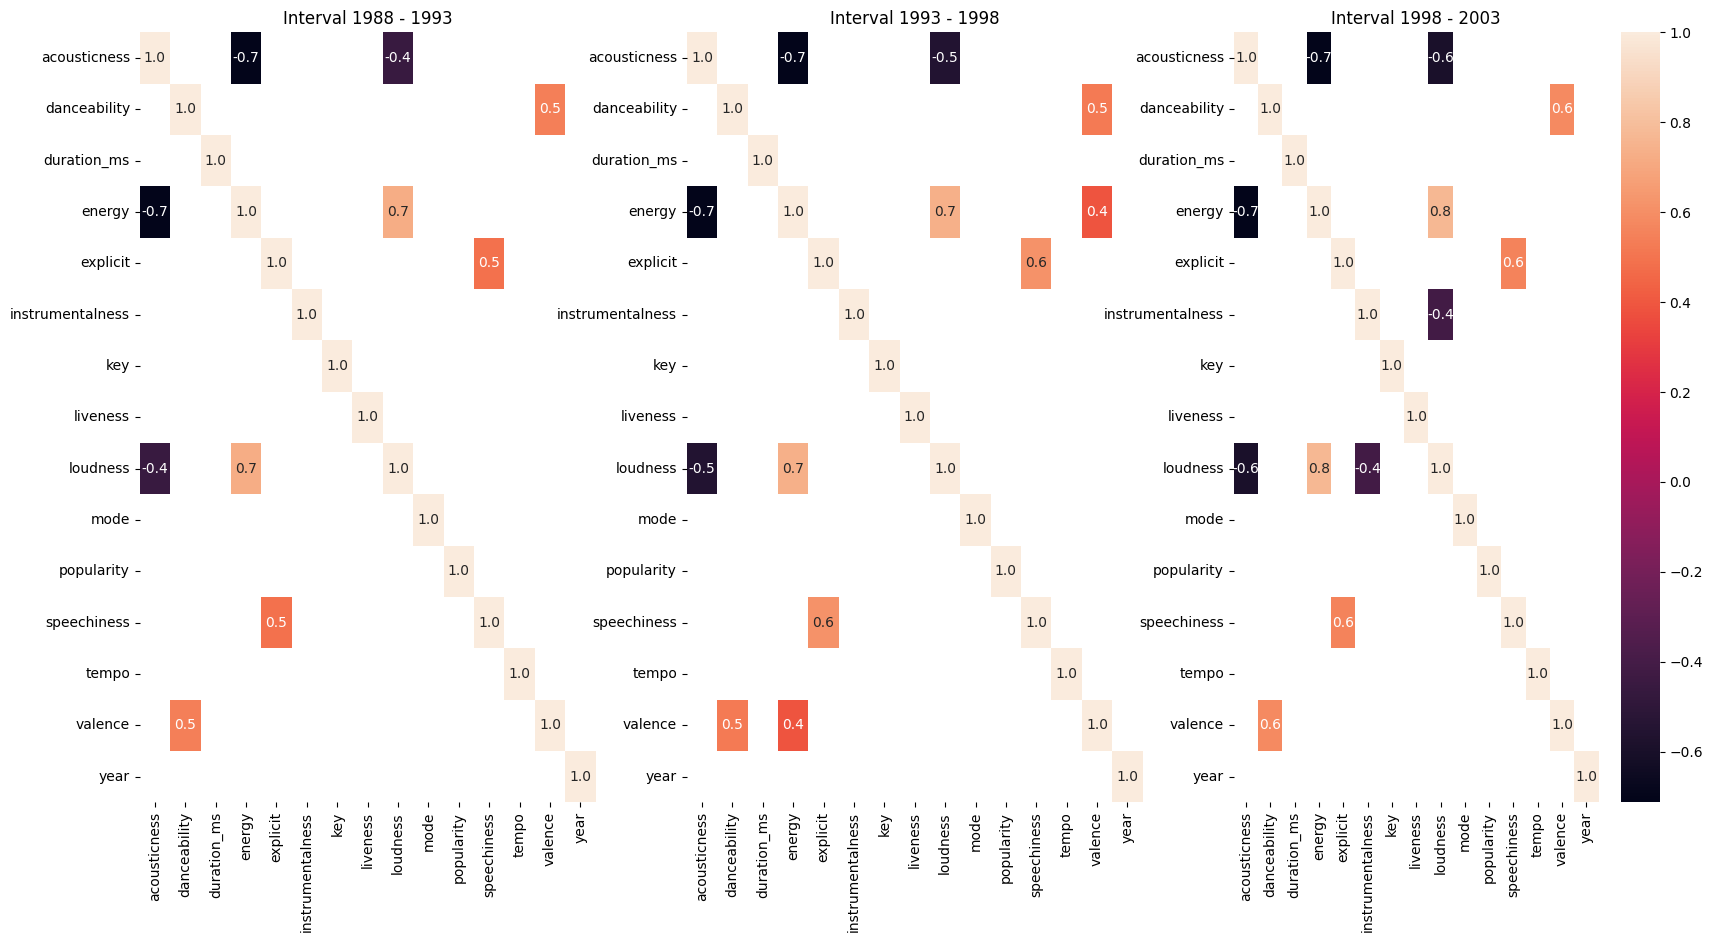

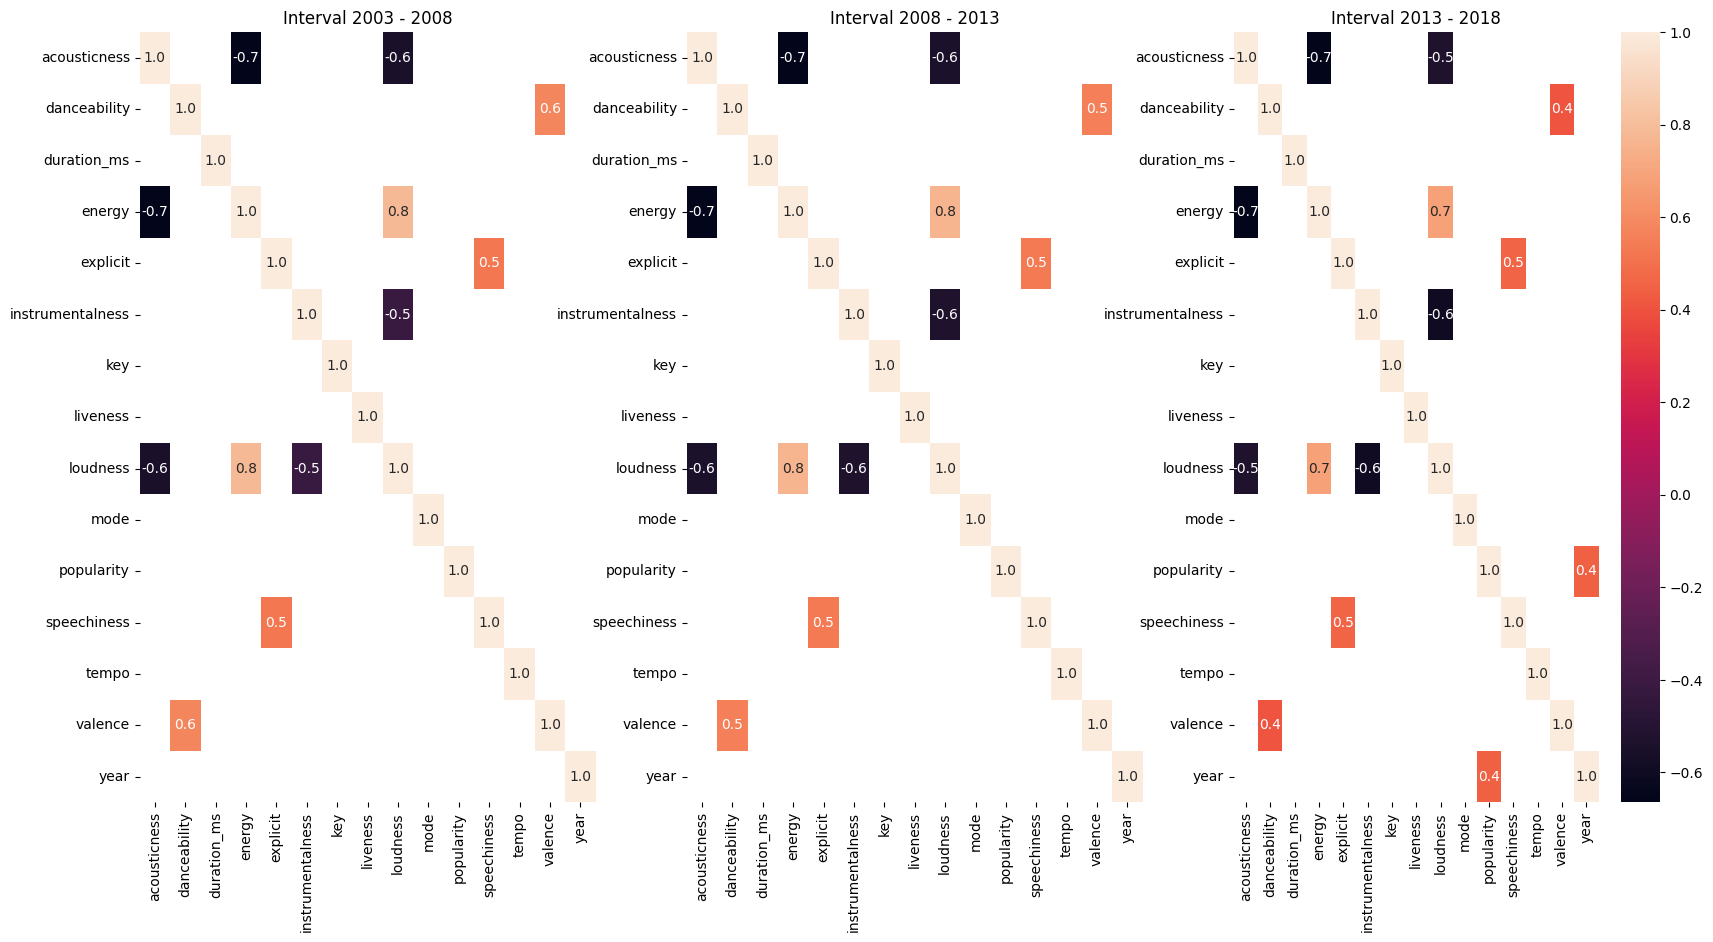

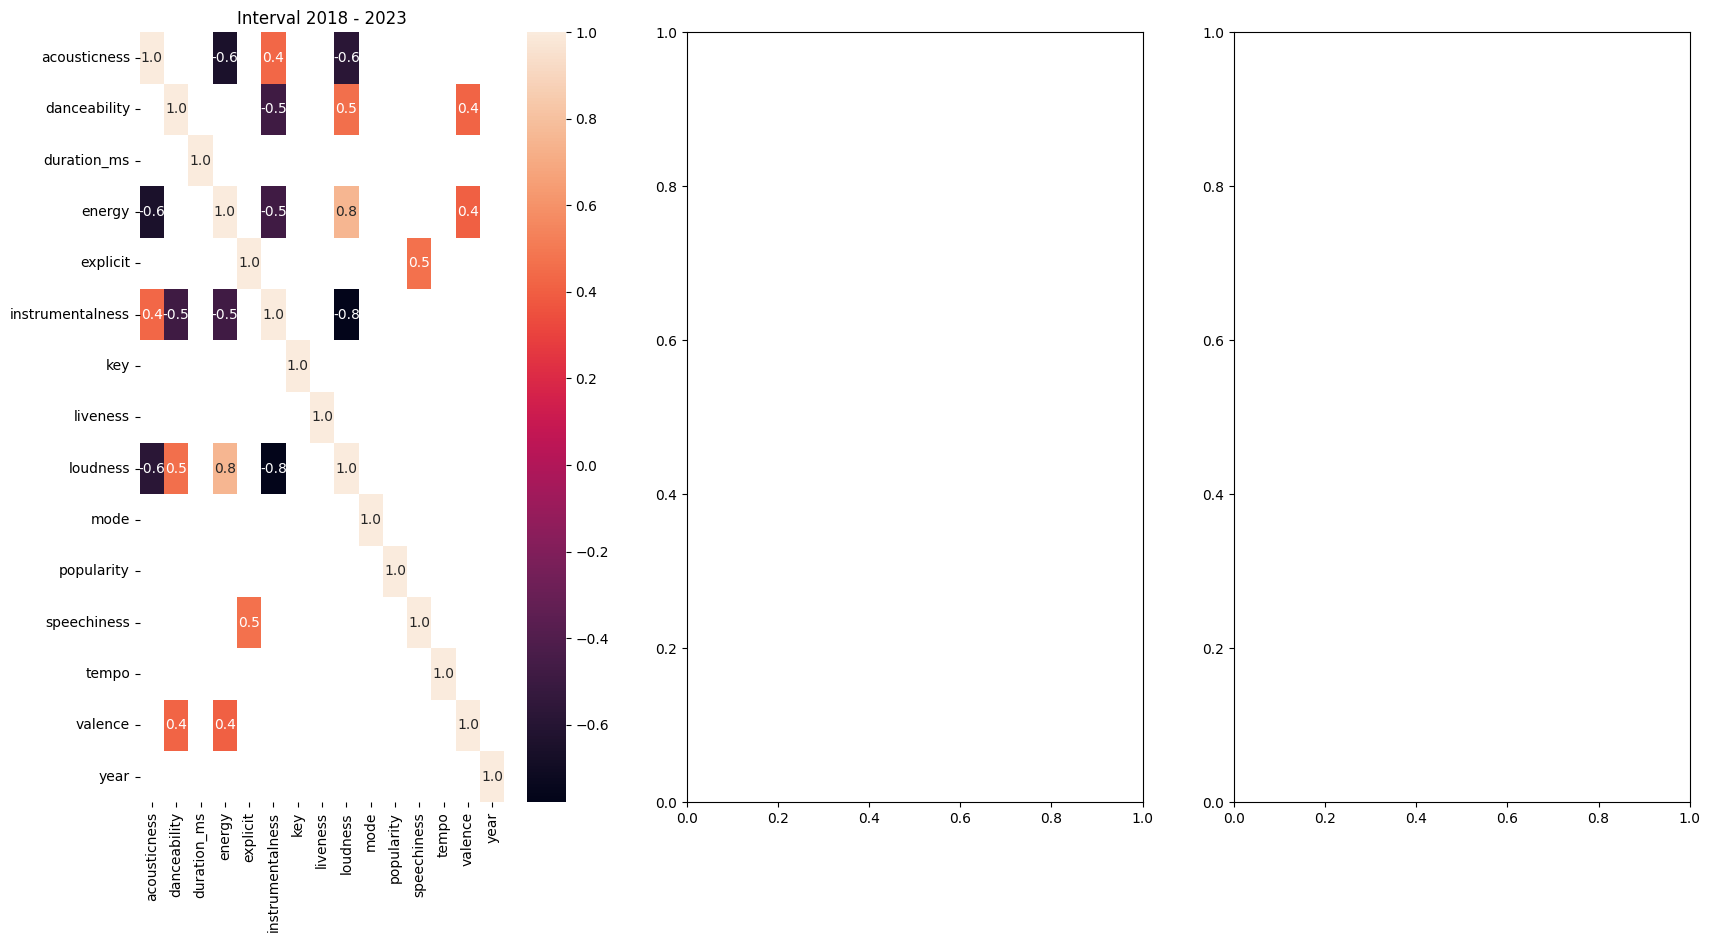

In [65]:
# ! pip install pandas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('spotify_data.csv')

cor_df = df.drop(['artists', 'id', 'name', 'release_date'], axis='columns')
X = cor_df['year']
for i in range(1928, 2020, 15):
    new_interval = cor_df[(X.between(i, i + 5)) & (cor_df['popularity'] > 50)]
    correlation_scores_5 = new_interval.corr()
    correlation_scores_5 = correlation_scores_5[(correlation_scores_5.iloc[:, 0: 19] >= 0.4) | (correlation_scores_5.iloc[:, 0: 19] <= -0.4)]

    if i+ 5 > 2020:
        fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(20,10))
        sns.heatmap(correlation_scores_5, ax=ax1, annot=True, fmt=".1f").set(title=f'Interval {i} - {i+5}')
        plt.show()

    else:
        next_interval = cor_df[(X.between(i+5, i+ 10)) & (cor_df['popularity'] > 50)]
        next_n_interval = cor_df[(X.between(i+10, i+ 15)) & (cor_df['popularity'] > 50)]

        correlation_scores_10 = next_interval.corr()
        correlation_scores_15 = next_n_interval.corr()

        correlation_scores_10 = correlation_scores_10[(correlation_scores_10.iloc[:, 0: 19] >= 0.4) | (correlation_scores_10.iloc[:, 0: 19] <= -0.4)]
        correlation_scores_15 = correlation_scores_15[(correlation_scores_15.iloc[:, 0: 19] >= 0.4) | (correlation_scores_15.iloc[:, 0: 19] <= -0.4)]    
        
        fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(20,10))

        sns.heatmap(correlation_scores_5, ax=ax1, annot=True, fmt=".1f", cbar=False).set(title=f'Interval {i} - {i+5}')
        sns.heatmap(correlation_scores_10, ax=ax2, annot=True, fmt=".1f", cbar=False).set(title=f'Interval {i+5} - {i+10}')
        sns.heatmap(correlation_scores_15, ax=ax3, annot=True, fmt=".1f").set(title=f'Interval {i+10} - {i+15}')
        plt.show()    


From the first results above, we see that intervals after 1950don't have any feature correlated with popularity. Let's see if that changes when we increase the interval to 10 year intervals.

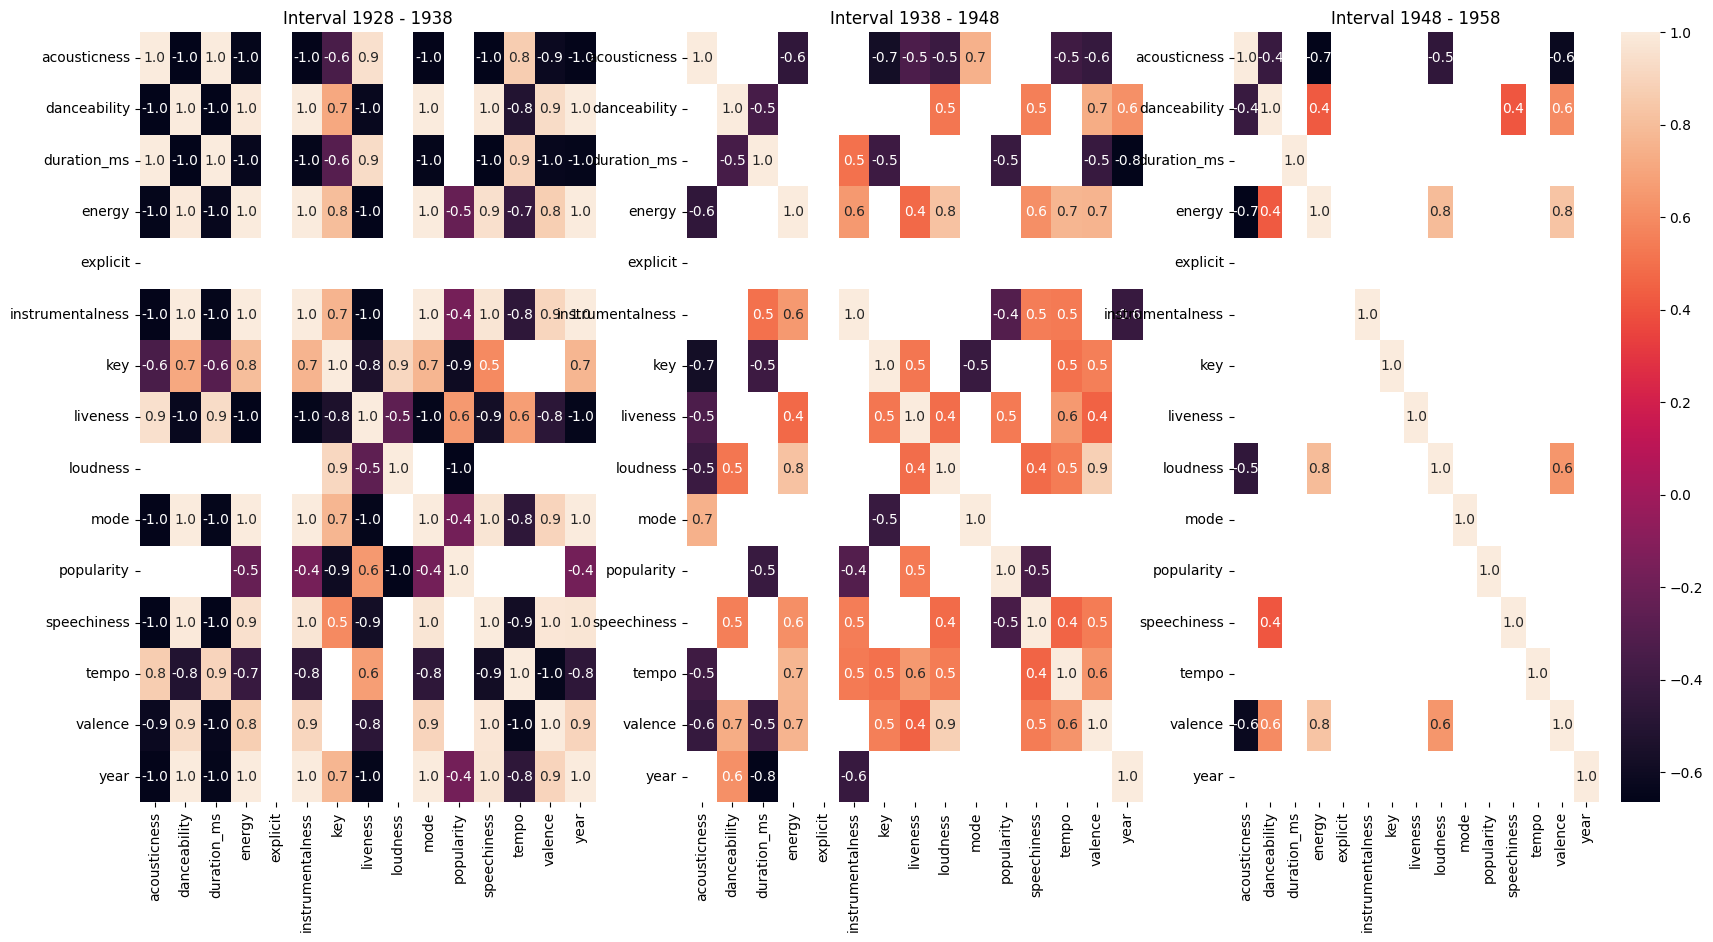

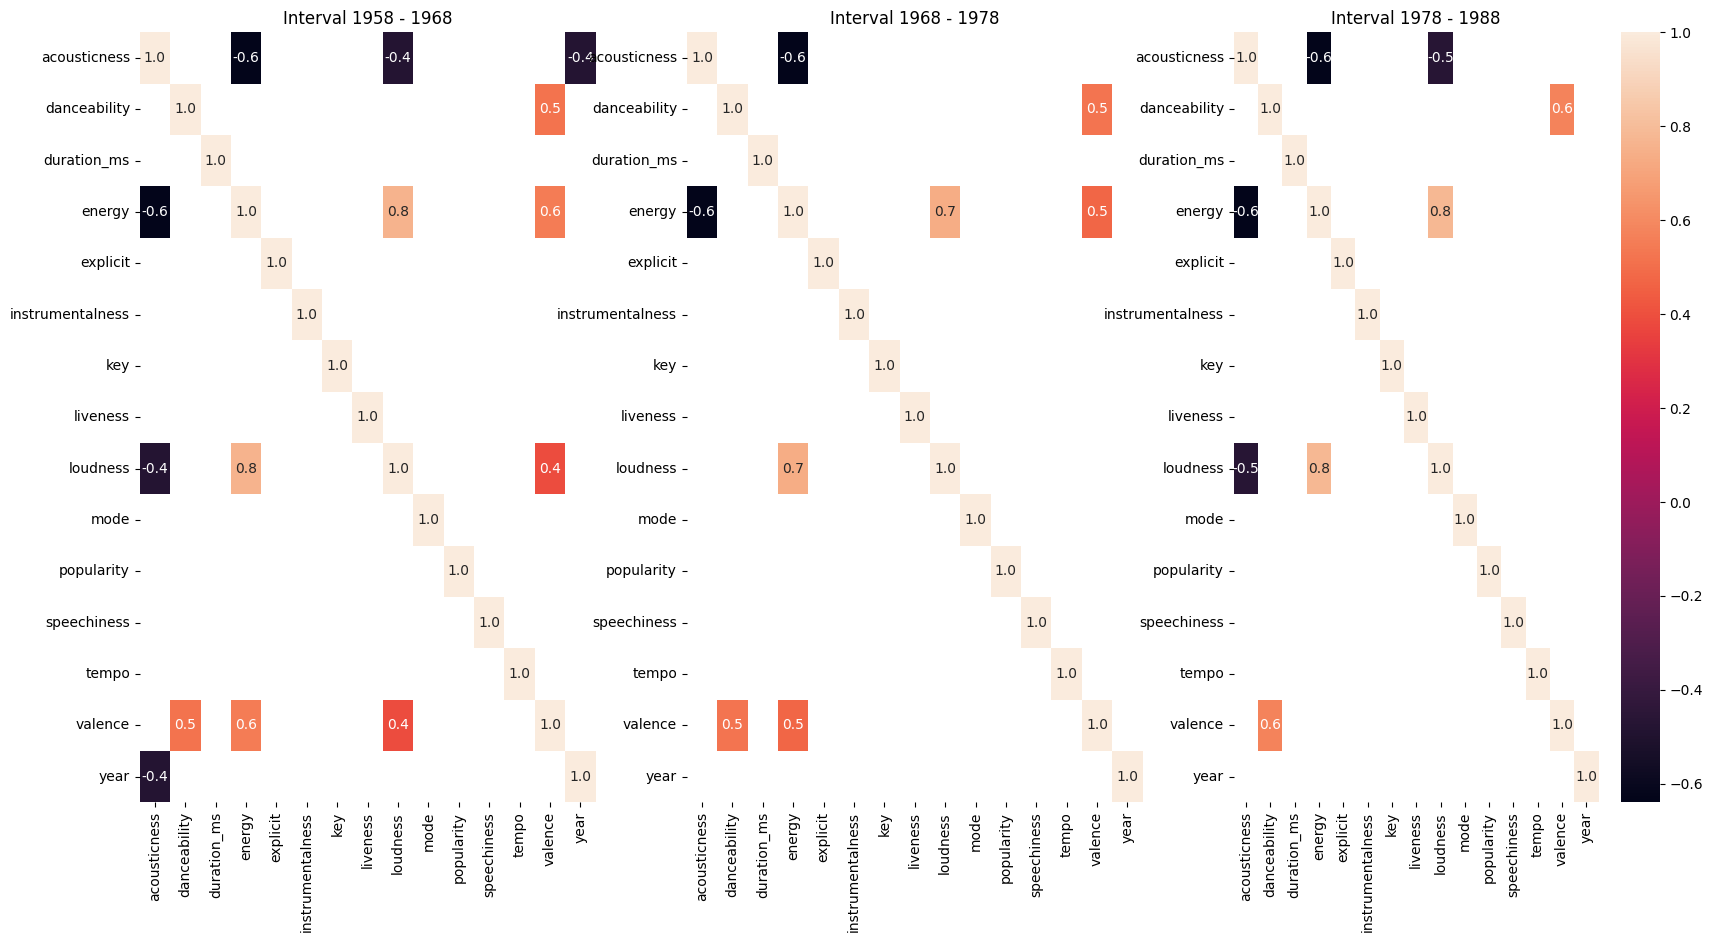

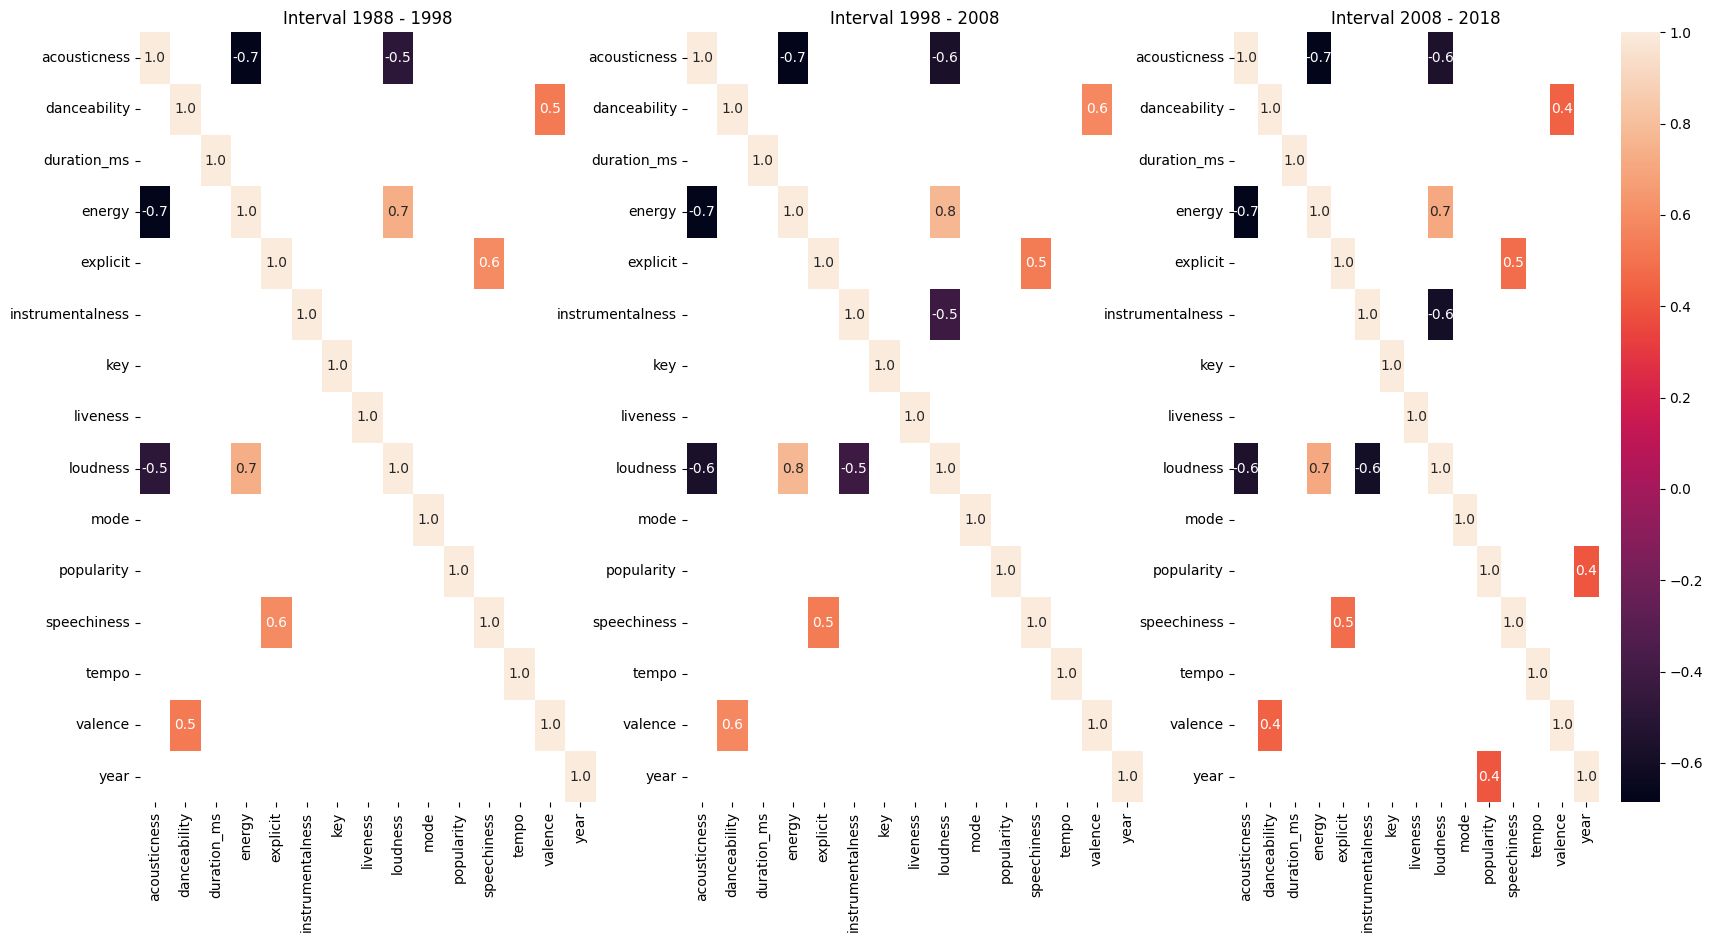

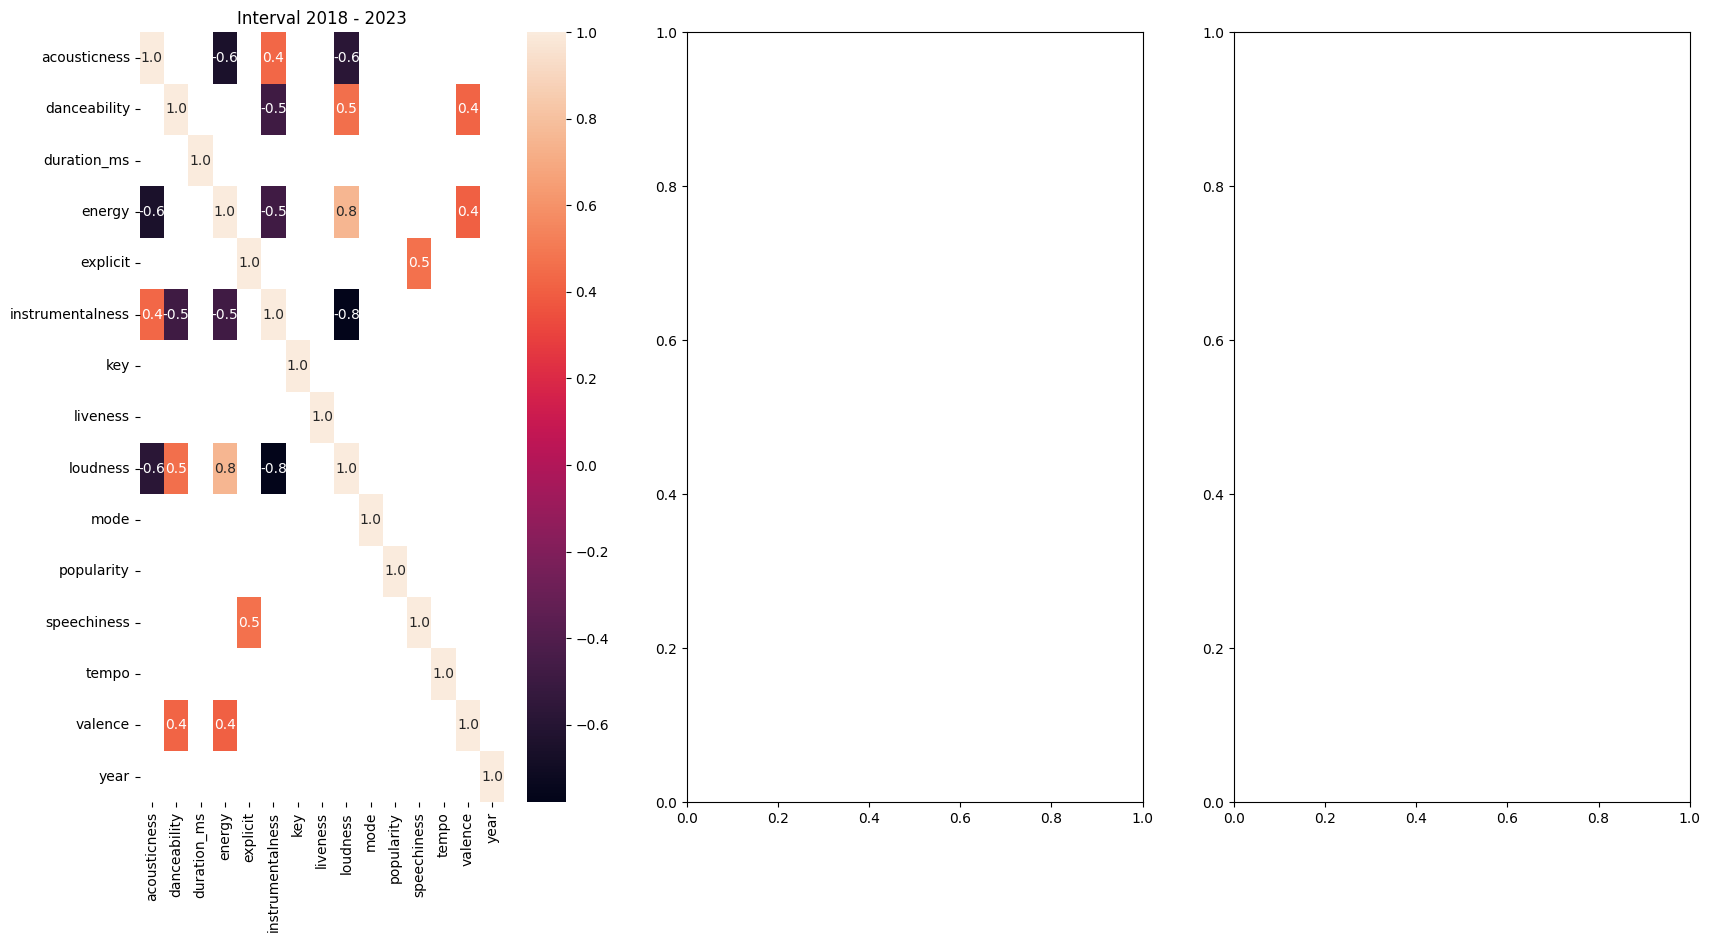

In [66]:
for i in range(1928, 2020, 30):
    new_interval = cor_df[(X.between(i, i + 10)) & (cor_df['popularity'] > 50)]
    correlation_scores_10 = new_interval.corr()
    correlation_scores_10 = correlation_scores_10[(correlation_scores_10.iloc[:, 0: 19] >= 0.4) | (correlation_scores_10.iloc[:, 0: 19] <= -0.4)]

    if i+ 10 > 2020:
        fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(20,10))
        sns.heatmap(correlation_scores_5, ax=ax1, annot=True, fmt=".1f").set(title=f'Interval {i} - {i+5}')
        plt.show()

    else:
        next_interval = cor_df[(X.between(i+10, i+ 20)) & (cor_df['popularity'] > 50)]
        next_n_interval = cor_df[(X.between(i+20, i+ 30)) & (cor_df['popularity'] > 50)]

        correlation_scores_20 = next_interval.corr()
        correlation_scores_30 = next_n_interval.corr()

        correlation_scores_20 = correlation_scores_20[(correlation_scores_20.iloc[:, 0: 19] >= 0.4) | (correlation_scores_20.iloc[:, 0: 19] <= -0.4)]
        correlation_scores_30 = correlation_scores_30[(correlation_scores_30.iloc[:, 0: 19] >= 0.4) | (correlation_scores_30.iloc[:, 0: 19] <= -0.4)]    
        
        fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(20,10))

        sns.heatmap(correlation_scores_10, ax=ax1, annot=True, fmt=".1f", cbar=False).set(title=f'Interval {i} - {i+10}')
        sns.heatmap(correlation_scores_20, ax=ax2, annot=True, fmt=".1f", cbar=False).set(title=f'Interval {i+10} - {i+20}')
        sns.heatmap(correlation_scores_30, ax=ax3, annot=True, fmt=".1f").set(title=f'Interval {i+20} - {i+30}')
        plt.show()



The same thing seems to be happening with no featue correlating with popularity (except itself) after 1948. Let's check the size of the interval and see if we get some insight. 

### Check the size of data in intervals

In [26]:
for i in range(1928, 2020, 10):
    # recall that we defined popularity by having a score greater than 50, so those are the songs that we are interested in
    new_interval = df[(X.between(i, i + 10)) & (df['popularity'] > 50)]
     
    print(f"{i} - {i+10}: {len(new_interval)}")

1928 - 1938: 3
1938 - 1948: 12
1948 - 1958: 120
1958 - 1968: 886
1968 - 1978: 2093
1978 - 1988: 2612
1988 - 1998: 4338
1998 - 2008: 8004
2008 - 2018: 16286
2018 - 2028: 5557


It appears that once the data is as large as 120, there are enough songs to determine that the popularity is not linearly correlated with any feature in an interval.

### Find features that are correlated to popularity for unpopular songs

The results in the previous sections show that popularity is not strongly positively or negatively correlated with anything but itself. Since we can't find an indicator for what a popular song would have when data gets large, let's try finding an indicator for what a song that is not popular will have.

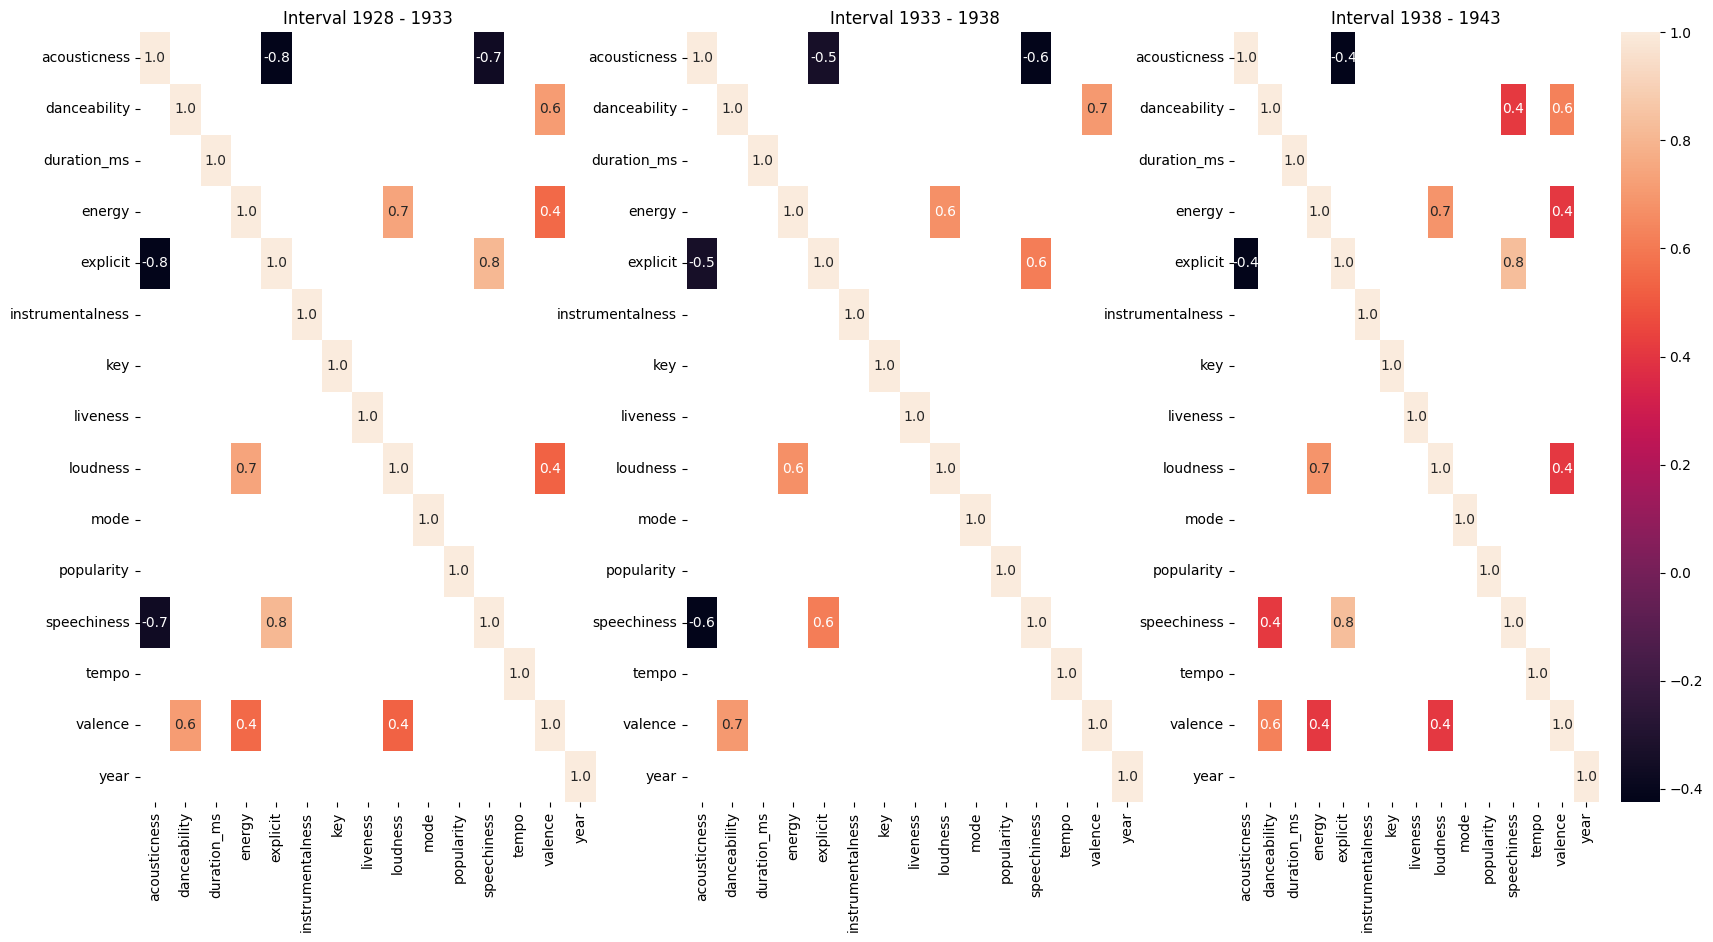

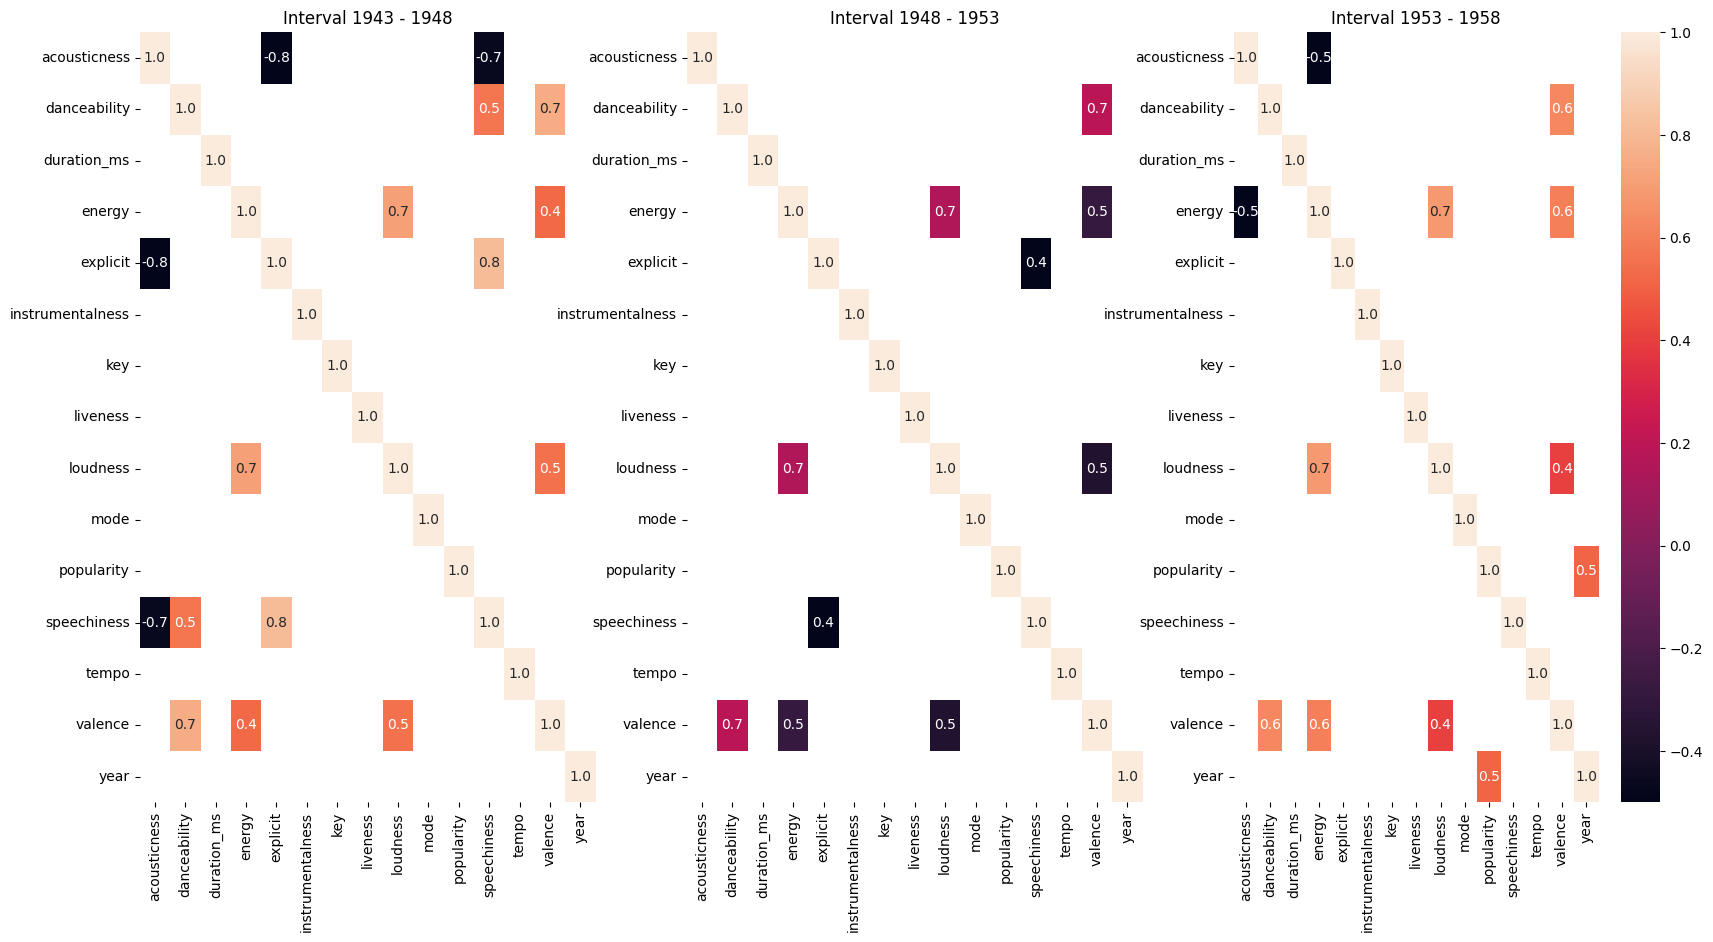

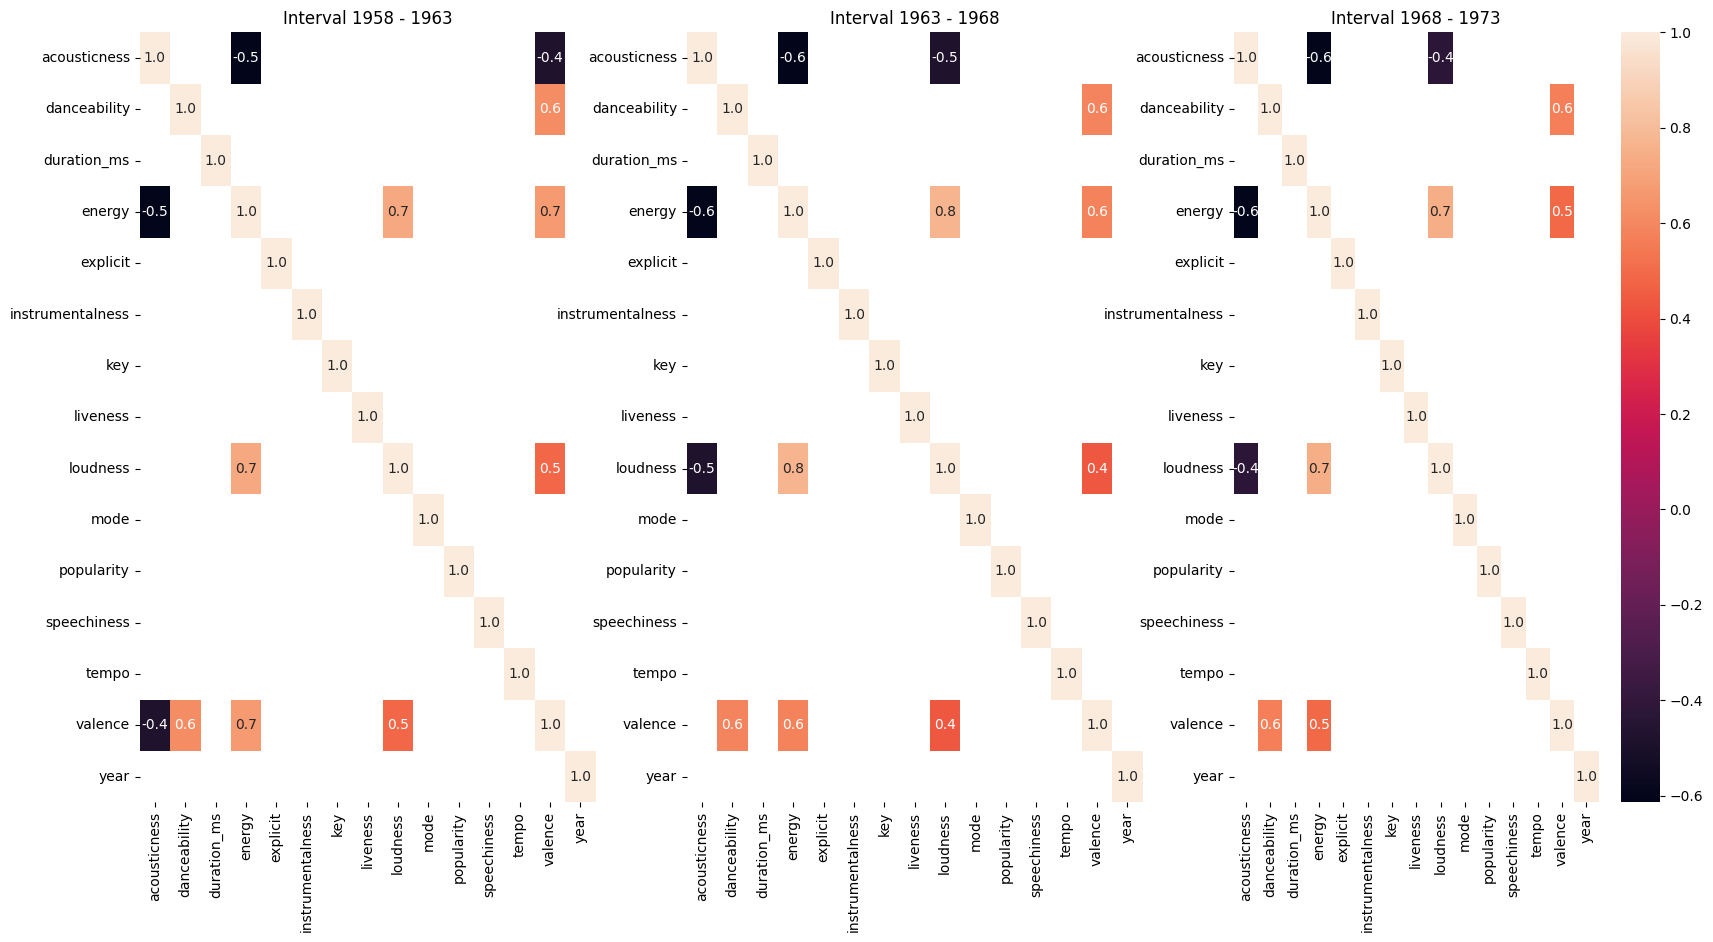

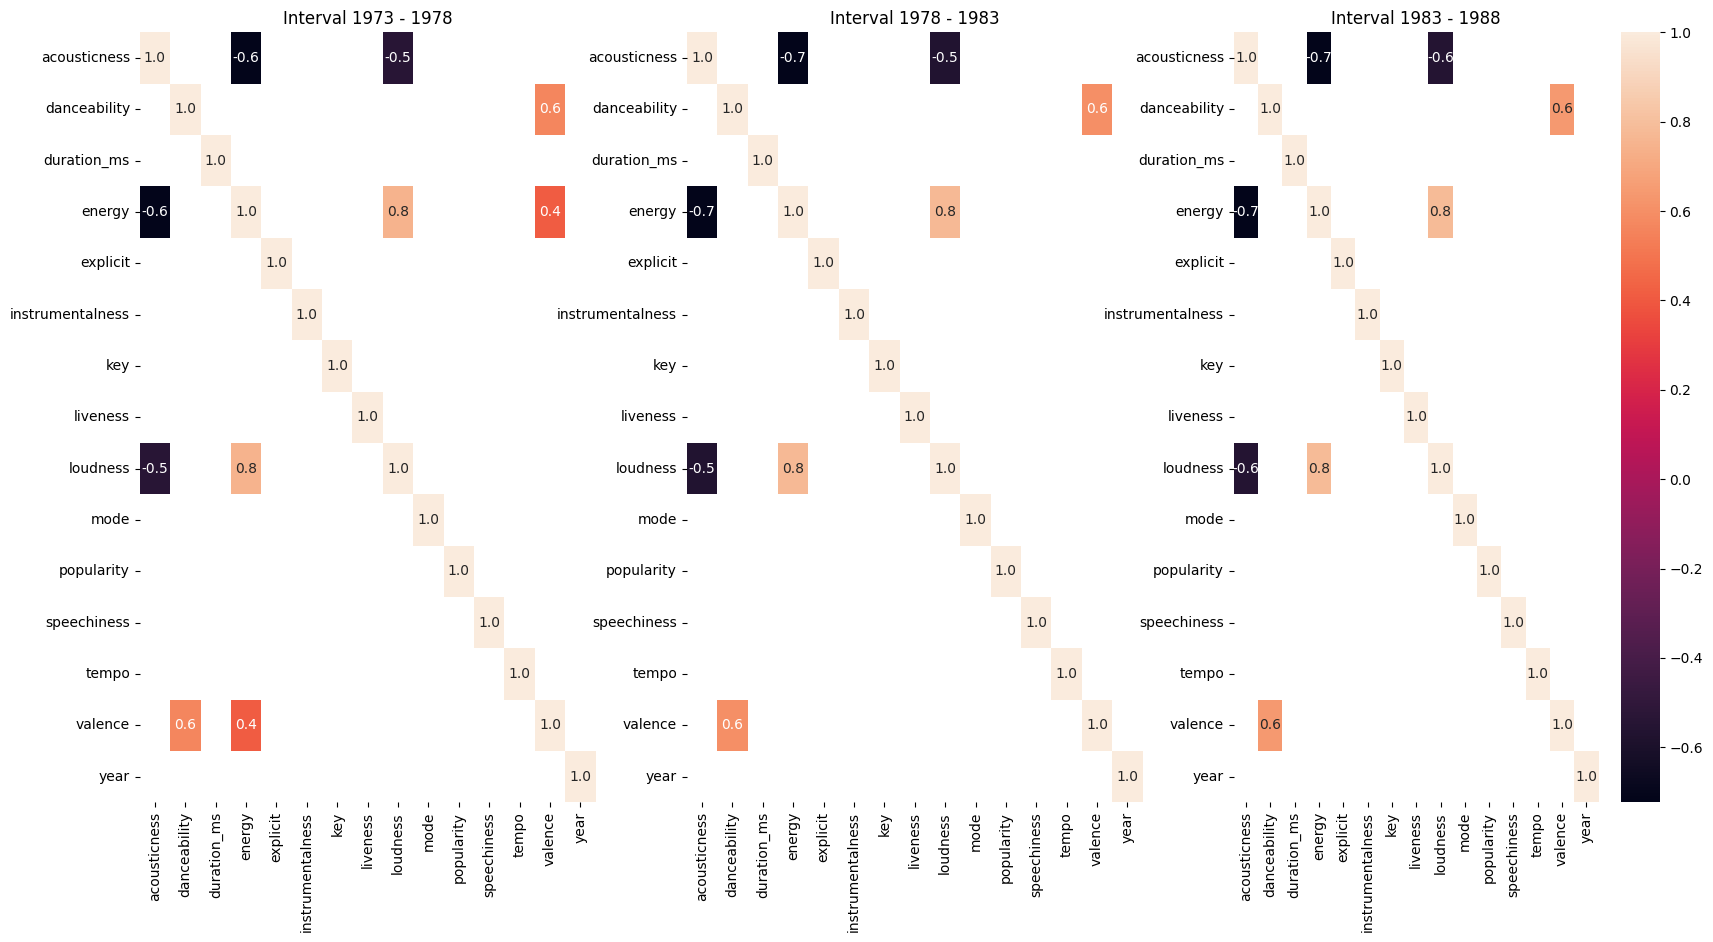

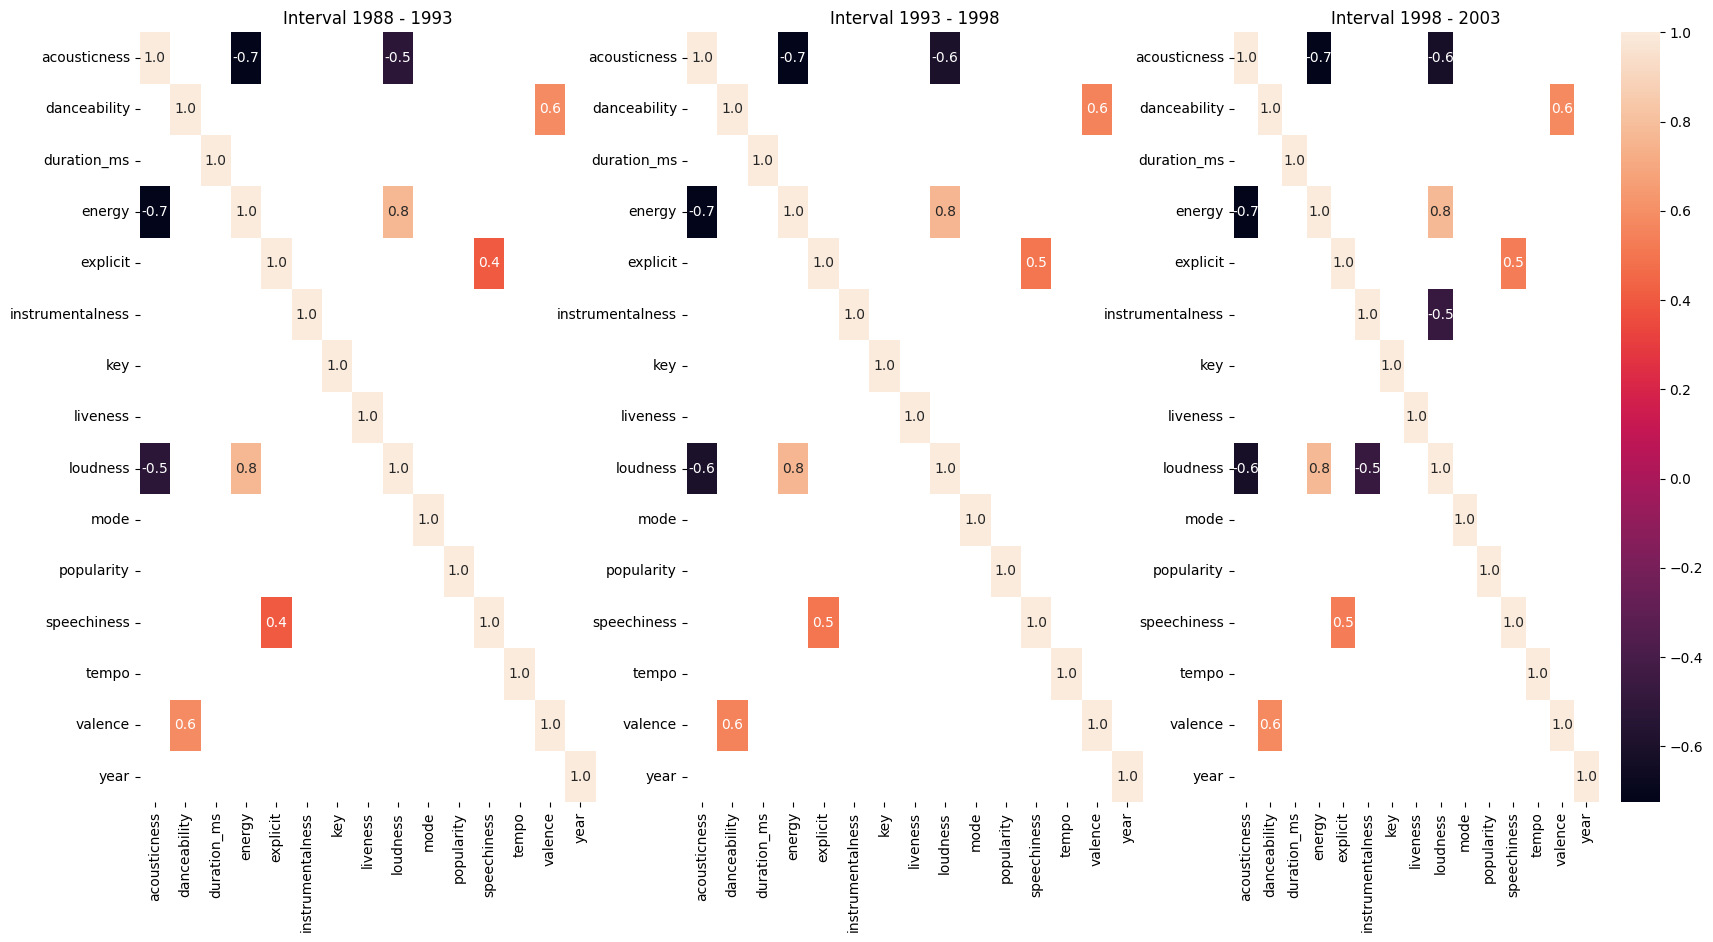

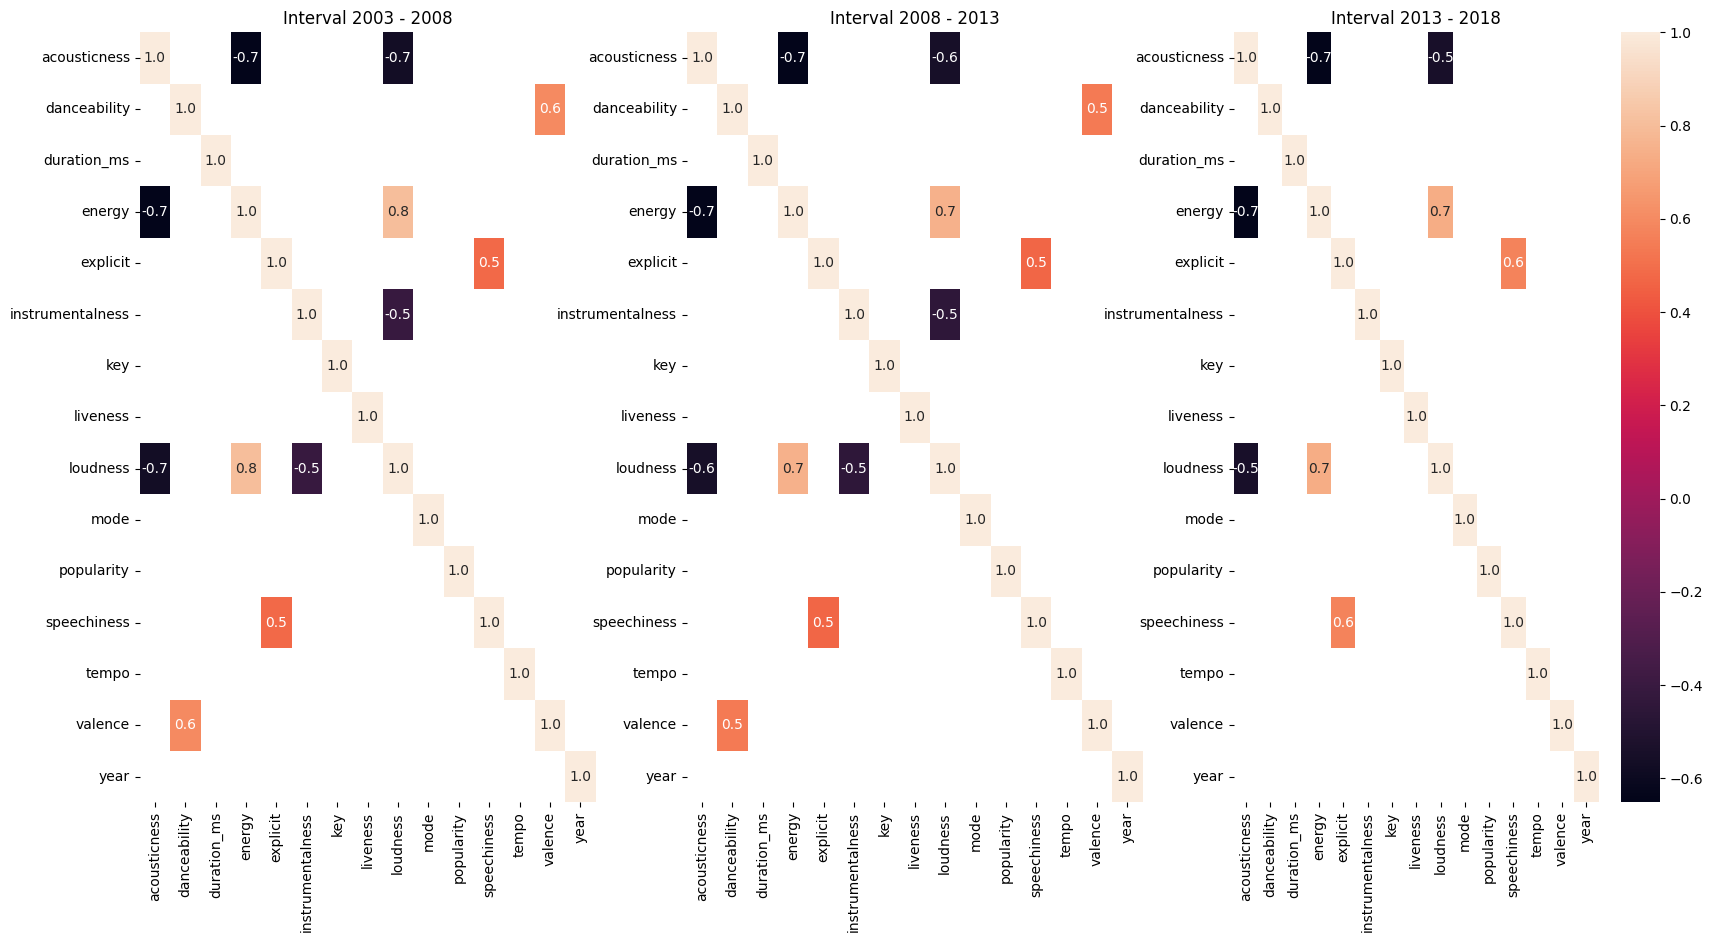

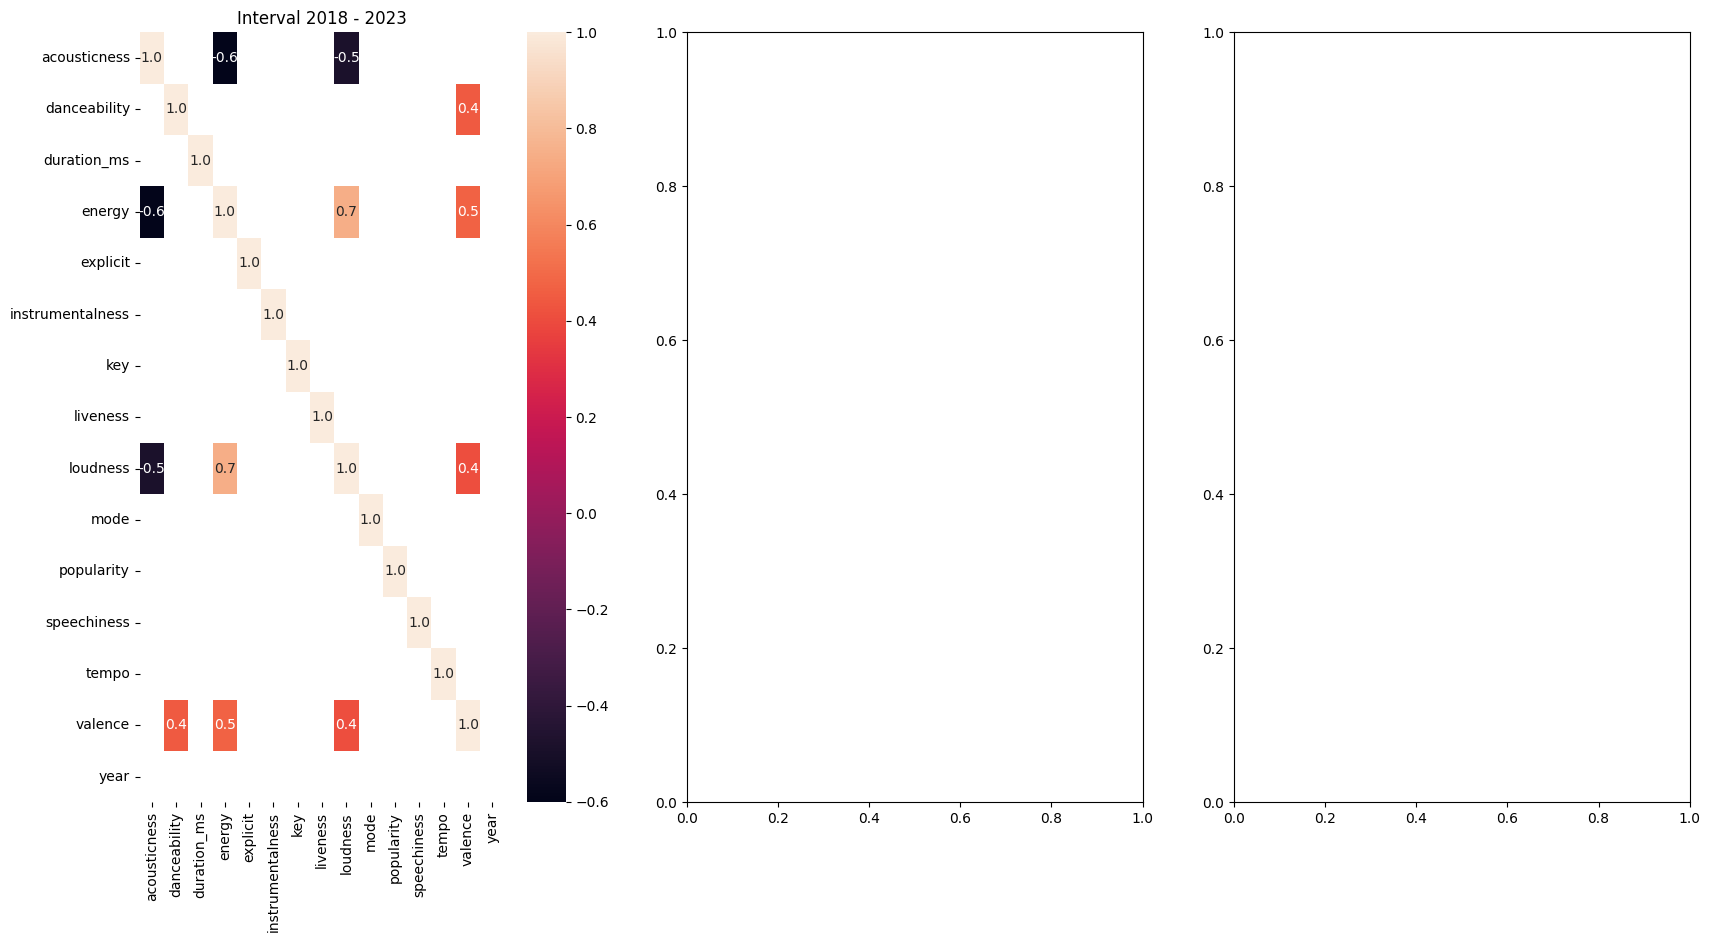

In [67]:
for i in range(1928, 2020, 15):
    new_interval = cor_df[(X.between(i, i + 5)) & (cor_df['popularity'] < 50)]
    correlation_scores_5 = new_interval.corr()
    correlation_scores_5 = correlation_scores_5[(correlation_scores_5.iloc[:, 0: 19] >= 0.4) | (correlation_scores_5.iloc[:, 0: 19] <= -0.4)]

    if i+ 5 > 2020:
        fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(20,10))
        sns.heatmap(correlation_scores_5, ax=ax1, annot=True, fmt=".1f").set(title=f'Interval {i} - {i+5}')
        plt.show()

    else:
        next_interval = cor_df[(X.between(i+5, i+ 10)) & (cor_df['popularity'] < 50)]
        next_n_interval = cor_df[(X.between(i+10, i+ 15)) & (cor_df['popularity'] < 50)]

        correlation_scores_10 = next_interval.corr()
        correlation_scores_15 = next_n_interval.corr()

        correlation_scores_10 = correlation_scores_10[(correlation_scores_10.iloc[:, 0: 19] >= 0.4) | (correlation_scores_10.iloc[:, 0: 19] <= -0.4)]
        correlation_scores_15 = correlation_scores_15[(correlation_scores_15.iloc[:, 0: 19] >= 0.4) | (correlation_scores_15.iloc[:, 0: 19] <= -0.4)]    
        
        fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(20,10))

        sns.heatmap(correlation_scores_5, ax=ax1, annot=True, fmt=".1f", cbar=False).set(title=f'Interval {i} - {i+5}')
        sns.heatmap(correlation_scores_10, ax=ax2, annot=True, fmt=".1f", cbar=False).set(title=f'Interval {i+5} - {i+10}')
        sns.heatmap(correlation_scores_15, ax=ax3, annot=True, fmt=".1f").set(title=f'Interval {i+10} - {i+15}')
        plt.show()



This time, even the early intervals don't have features that correlate with popularity. Let's now try a 10 year interval.

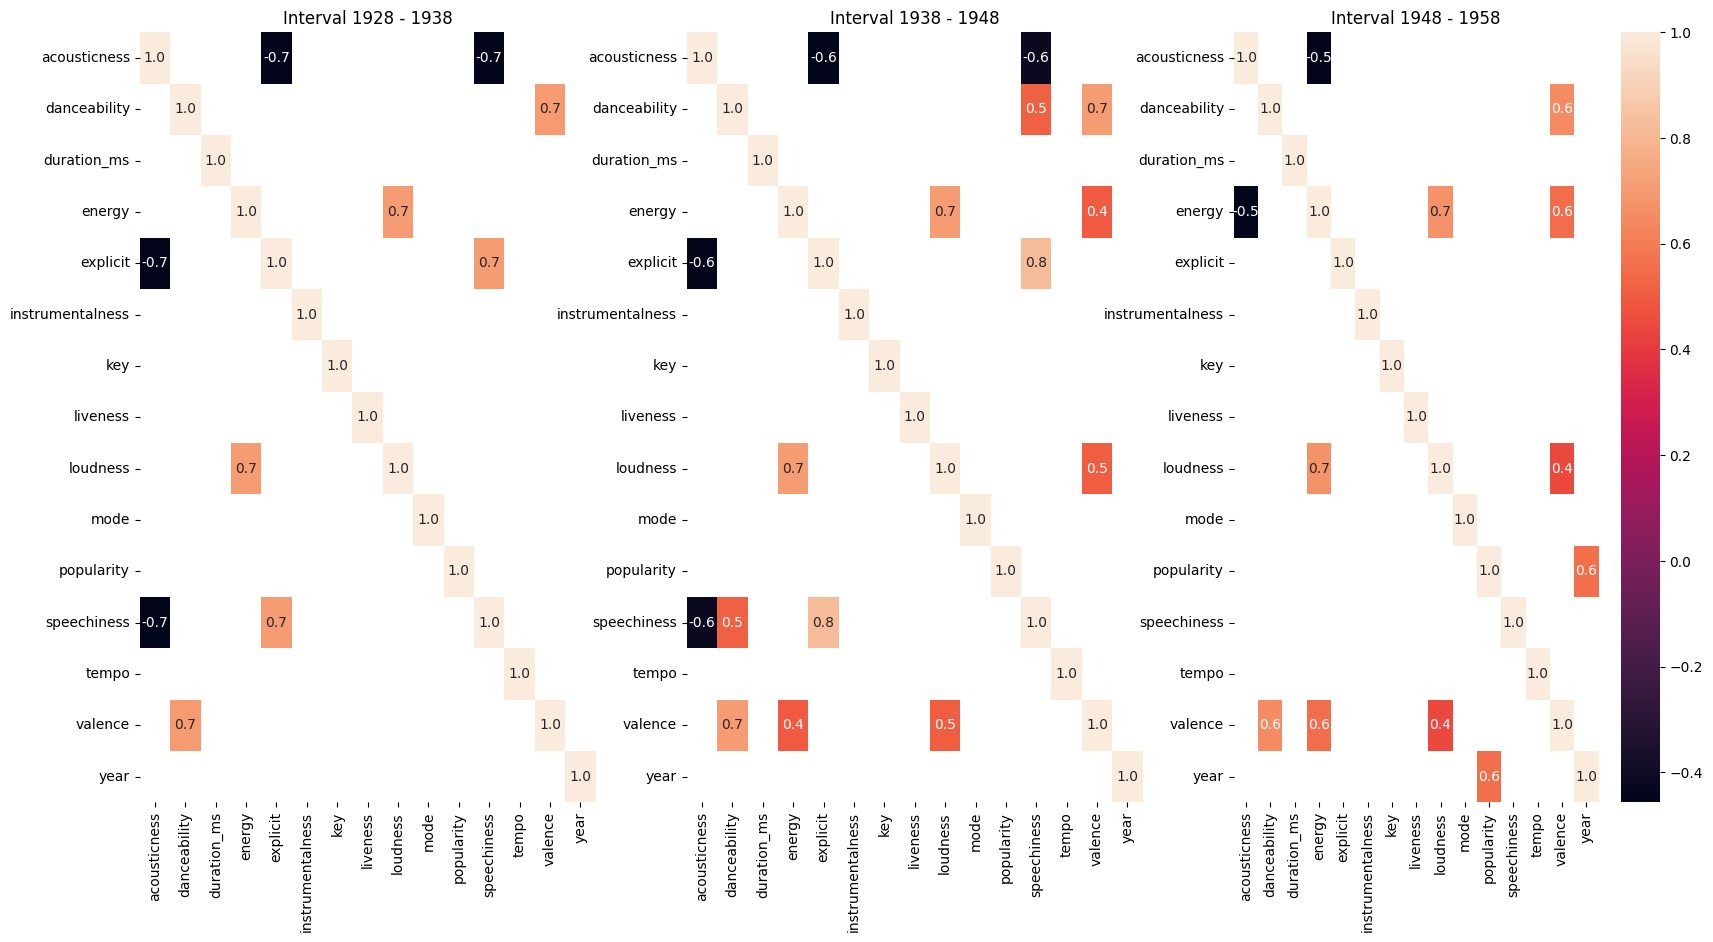

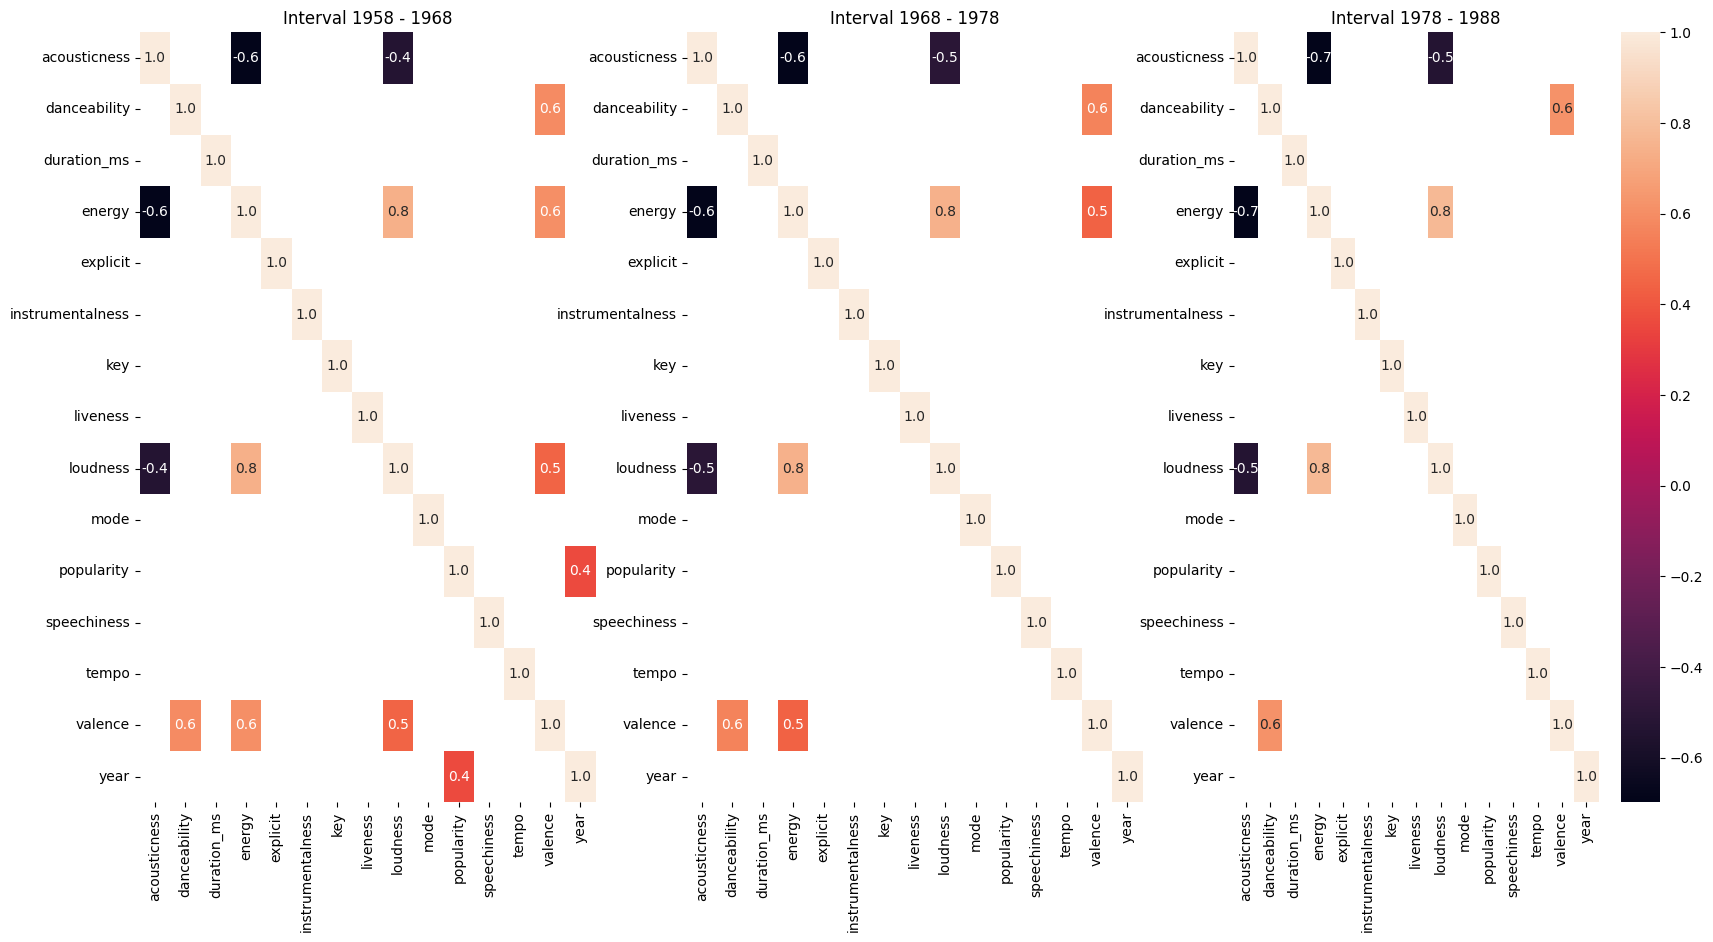

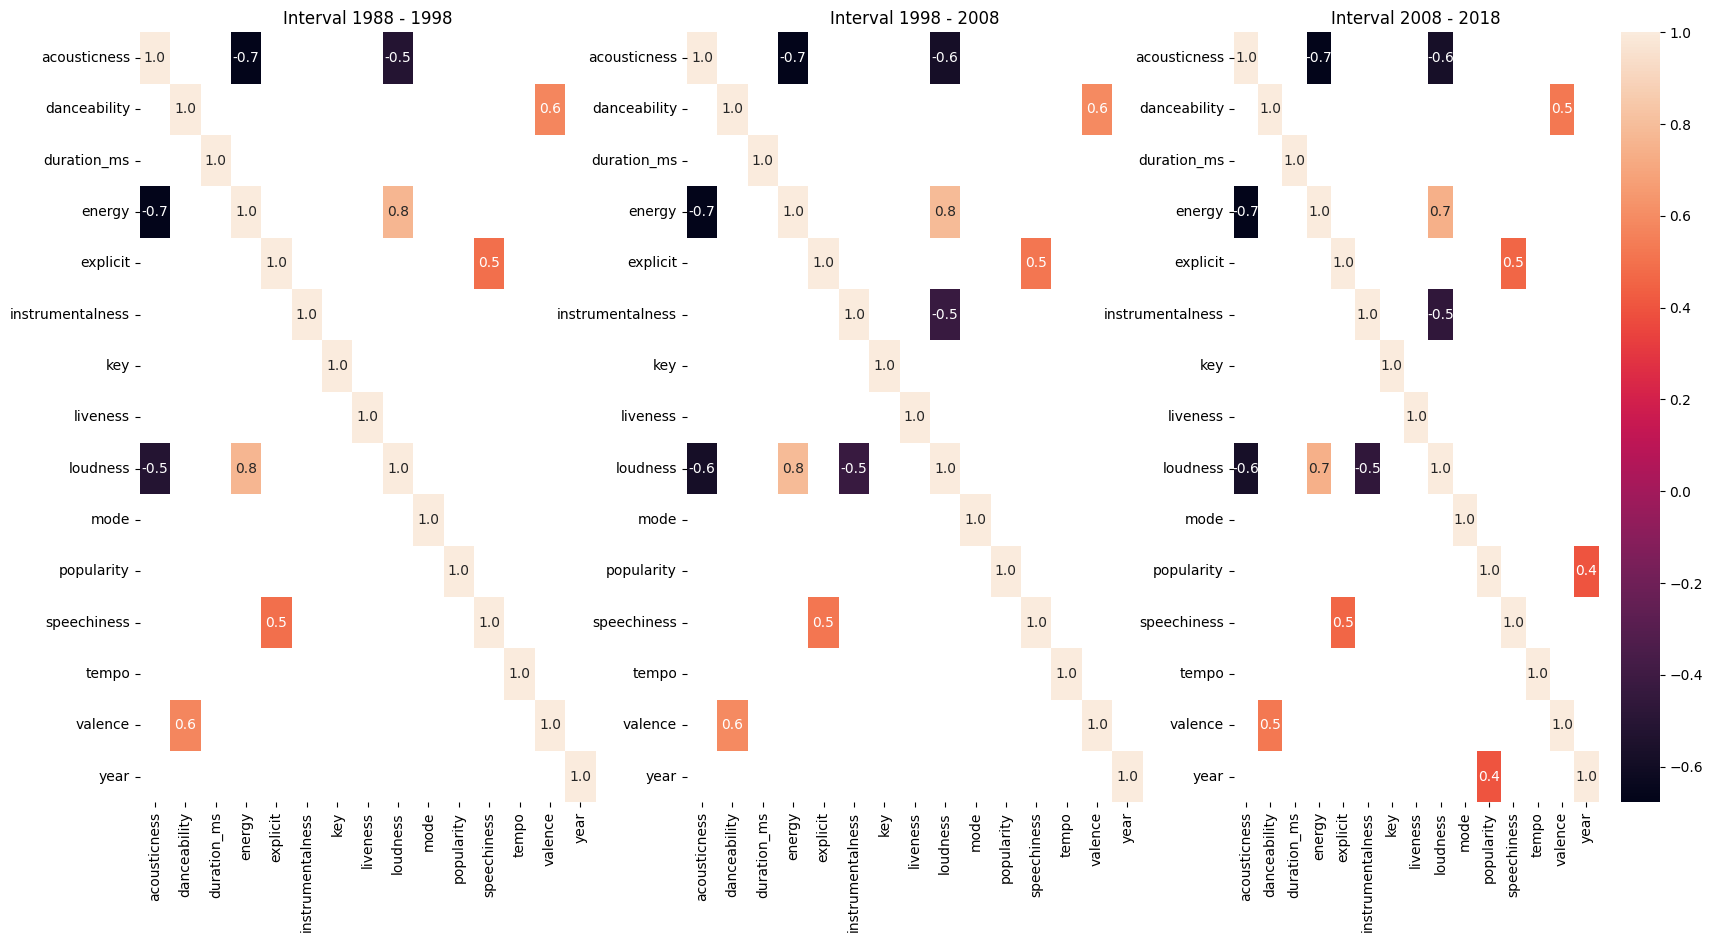

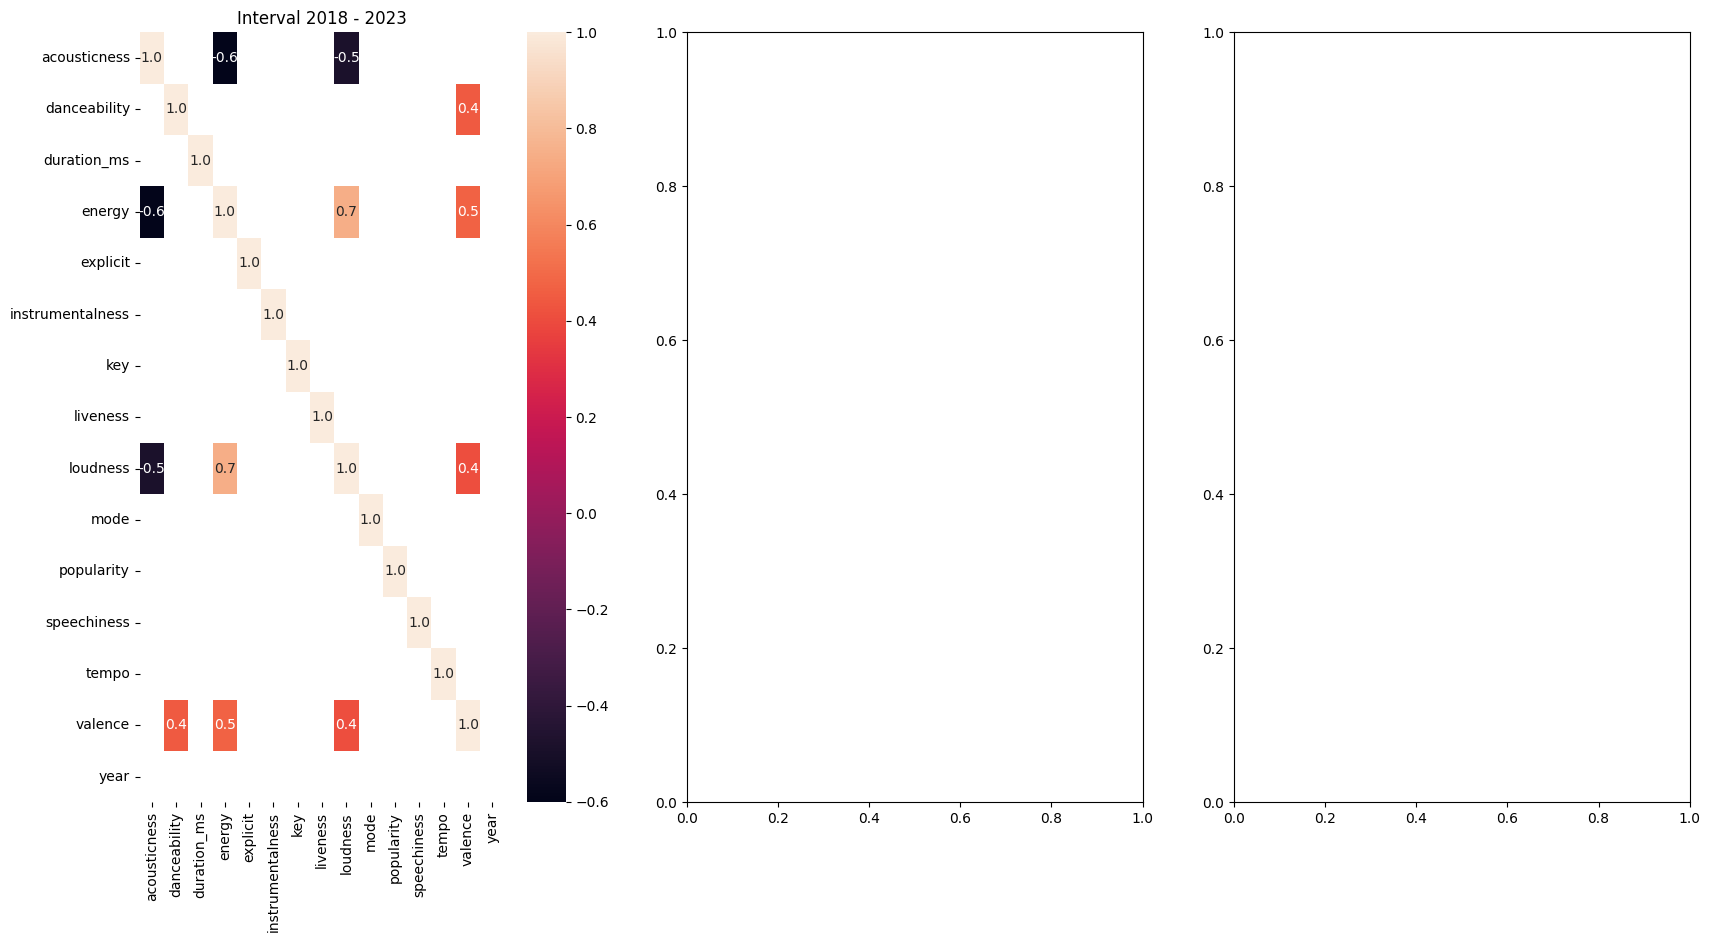

In [68]:
for i in range(1928, 2020, 30):
    new_interval = cor_df[(X.between(i, i + 10)) & (cor_df['popularity'] < 50)]
    correlation_scores_10 = new_interval.corr()
    correlation_scores_10 = correlation_scores_10[(correlation_scores_10.iloc[:, 0: 19] >= 0.4) | (correlation_scores_10.iloc[:, 0: 19] <= -0.4)]

    if i+ 10 > 2020:
        fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(20,10))
        sns.heatmap(correlation_scores_5, ax=ax1, annot=True, fmt=".1f").set(title=f'Interval {i} - {i+5}')
        plt.show()

    else:
        next_interval = cor_df[(X.between(i+10, i+ 20)) & (cor_df['popularity'] < 50)]
        next_n_interval = cor_df[(X.between(i+20, i+ 30)) & (cor_df['popularity'] < 50)]

        correlation_scores_20 = next_interval.corr()
        correlation_scores_30 = next_n_interval.corr()

        correlation_scores_20 = correlation_scores_20[(correlation_scores_20.iloc[:, 0: 19] >= 0.4) | (correlation_scores_20.iloc[:, 0: 19] <= -0.4)]
        correlation_scores_30 = correlation_scores_30[(correlation_scores_30.iloc[:, 0: 19] >= 0.4) | (correlation_scores_30.iloc[:, 0: 19] <= -0.4)]    
        
        fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(20,10))

        sns.heatmap(correlation_scores_10, ax=ax1, annot=True, fmt=".1f", cbar=False).set(title=f'Interval {i} - {i+10}')
        sns.heatmap(correlation_scores_20, ax=ax2, annot=True, fmt=".1f", cbar=False).set(title=f'Interval {i+10} - {i+20}')
        sns.heatmap(correlation_scores_30, ax=ax3, annot=True, fmt=".1f").set(title=f'Interval {i+20} - {i+30}')
        plt.show()


We see that for the 10 year interval, only 2 sets of intervals have year correlating with them and the rest have no feature correlating with popularity. So, for both songs that are popular and songs that are not popular, there is are not enoughfeatures correlating with popularity in the intervals.

### Pairwise ploting for popularity against all other features

Since we see that the year and the popularity are don't have enough features that they linearly correlate with in the intervals, let us plot their relationships with the other features to inspect if there is any relationship(non-linear)

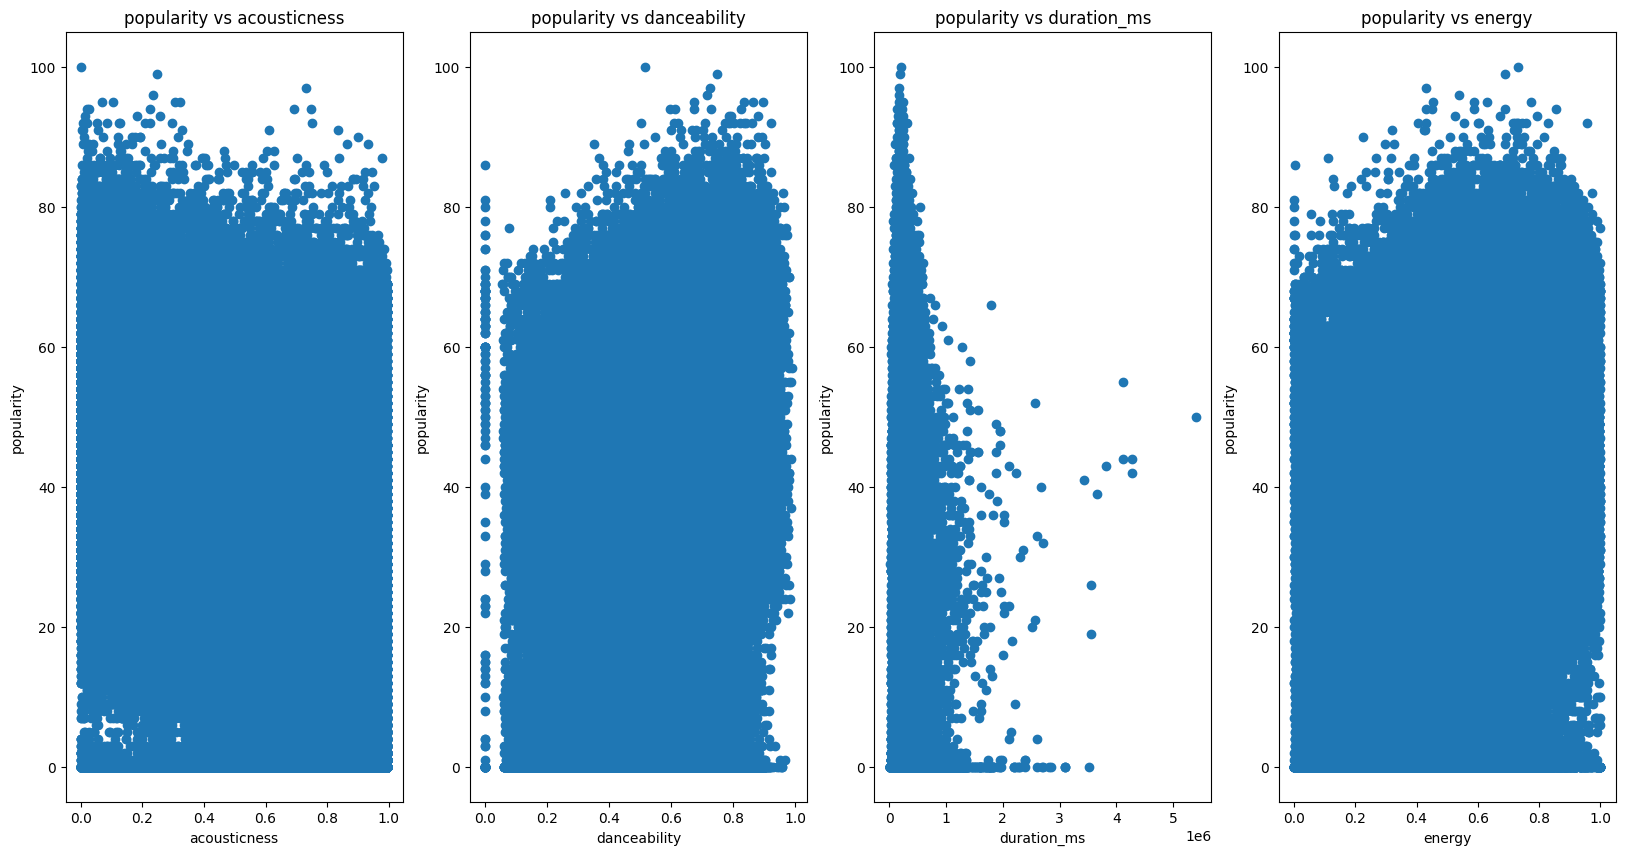

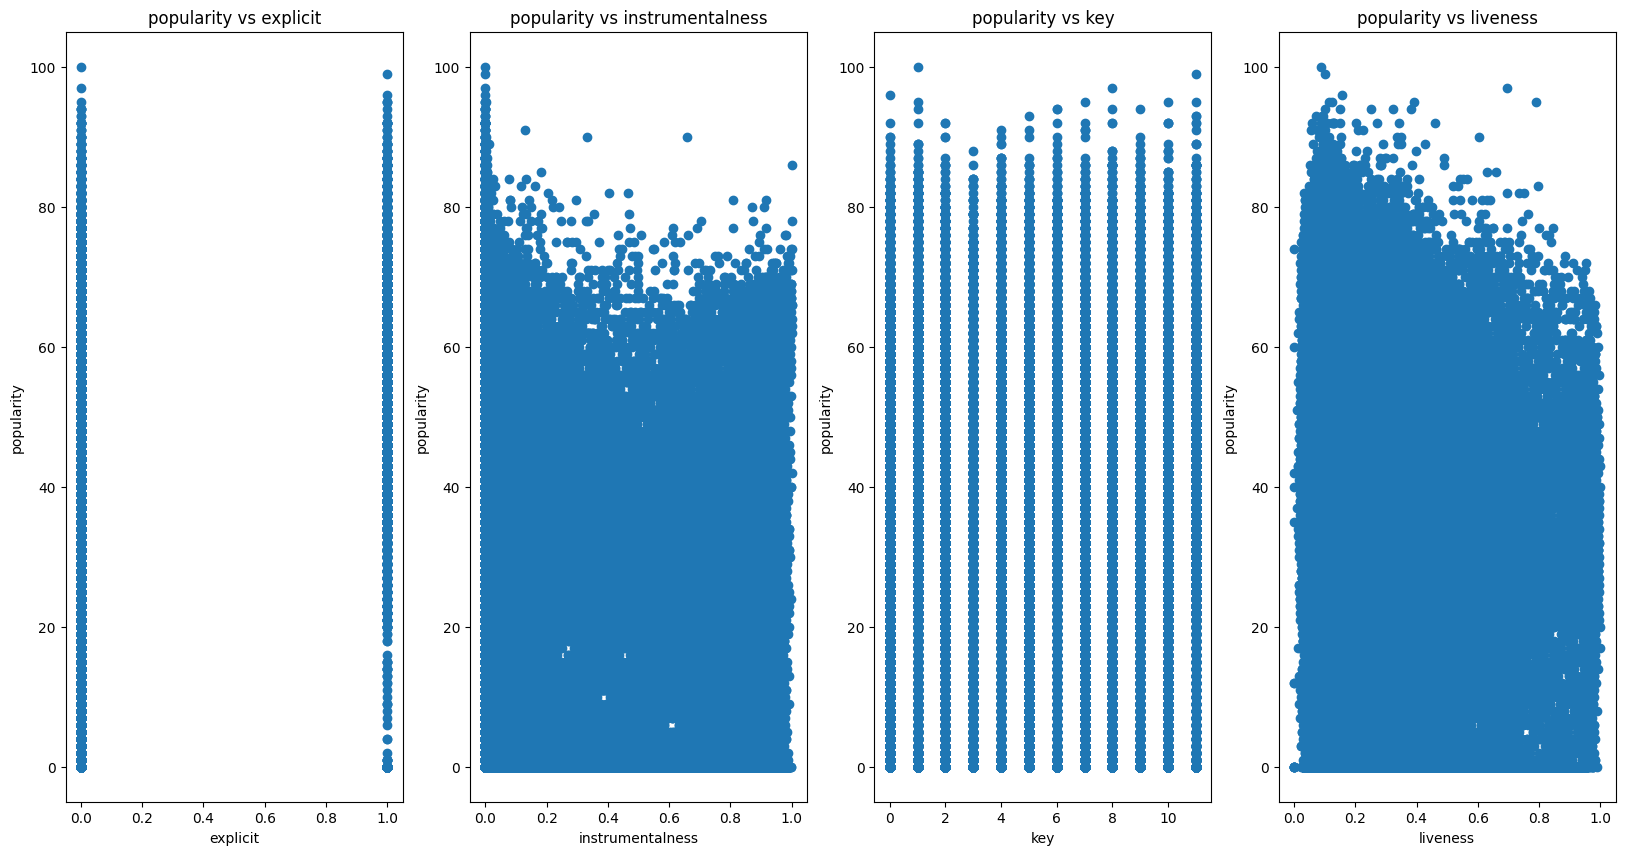

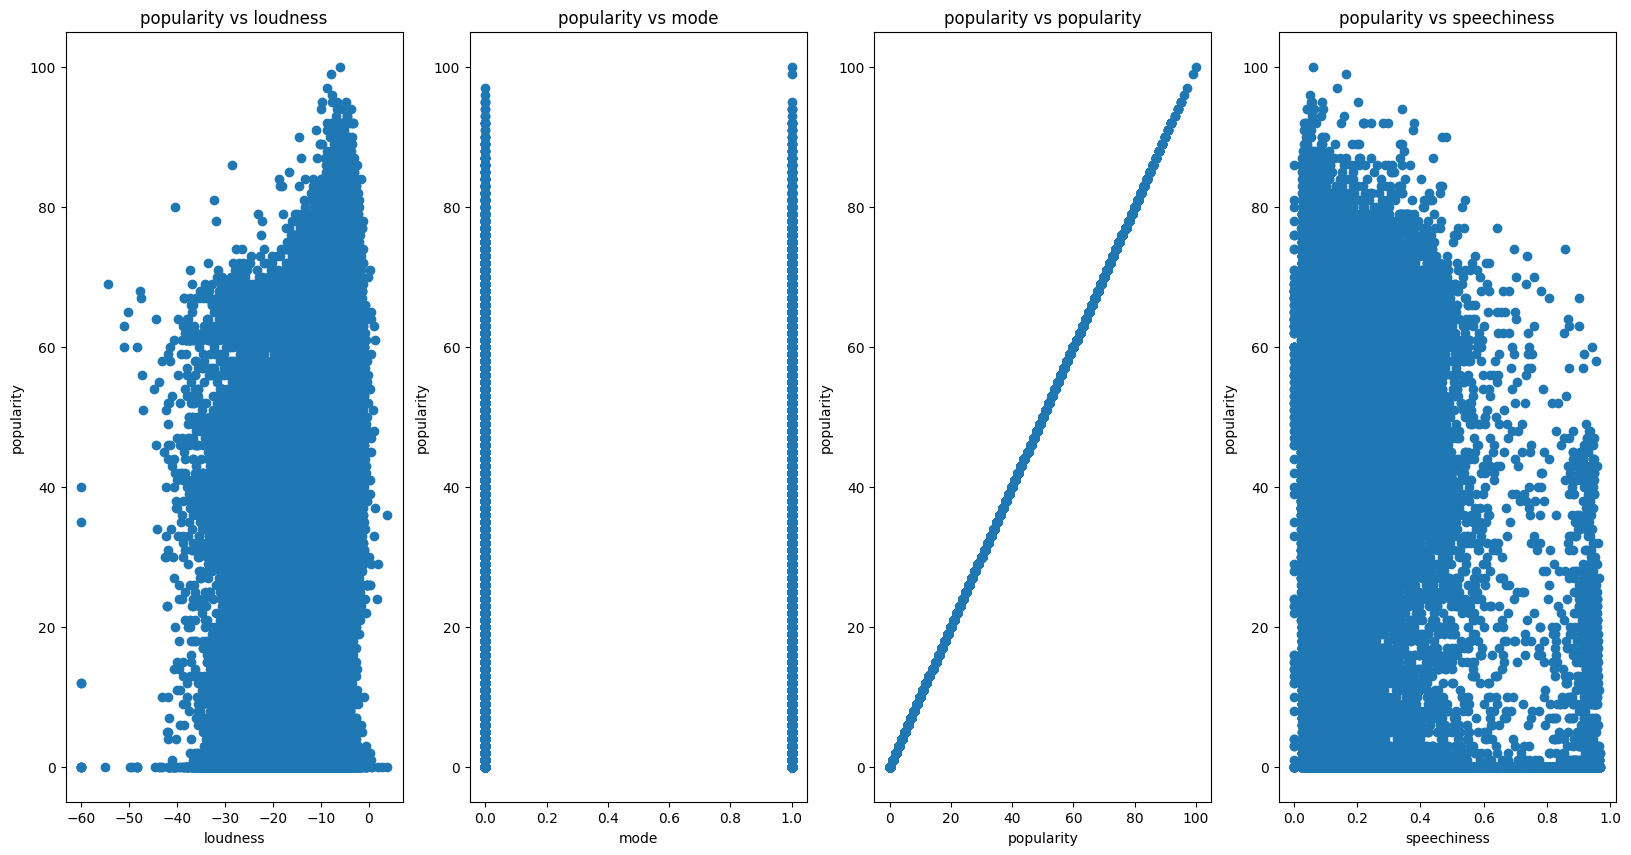

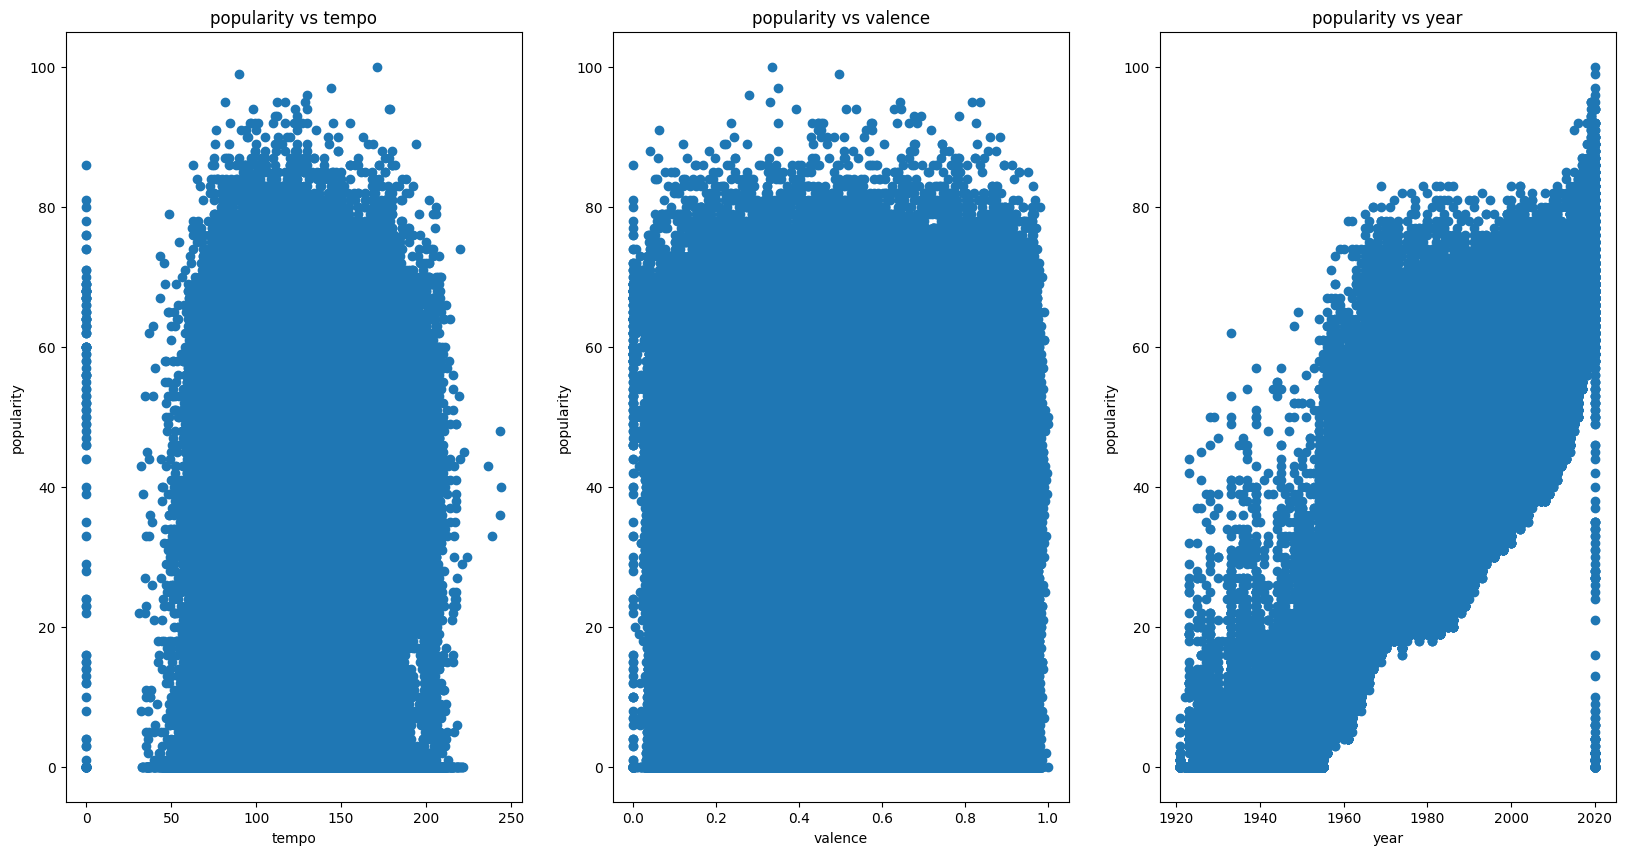

In [69]:
import matplotlib.pyplot as plt

nw_new_interval = df.drop(['artists', 'id', 'name', 'release_date',], axis='columns')
cols = list(nw_new_interval.columns)
for i in range(0, len(cols),4):
    if i+4 > len(cols):
        figure, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(20,10))
        ax1.set_title(f"popularity vs {cols[i]}")
        ax1.set_xlabel(f'{cols[i]}')
        ax1.set_ylabel(f'popularity')

        ax2.set_title(f"popularity vs {cols[i+1]}")
        ax2.set_xlabel(f'{cols[i+1]}')
        ax2.set_ylabel(f'popularity')

        ax3.set_title(f"popularity vs {cols[i+2]}")
        ax3.set_xlabel(f'{cols[i+2]}')
        ax3.set_ylabel(f'popularity')

        ax1.scatter(nw_new_interval[cols[i]], nw_new_interval['popularity'])
        ax2.scatter(nw_new_interval[cols[i+1]], nw_new_interval['popularity'])
        ax3.scatter(nw_new_interval[cols[i+2]], nw_new_interval['popularity'])
        plt.show()
    else:
        figure, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(20,10))
        ax1.set_title(f"popularity vs {cols[i]}")
        ax1.set_xlabel(f'{cols[i]}')
        ax1.set_ylabel(f'popularity')

        ax2.set_title(f"popularity vs {cols[i+1]}")
        ax2.set_xlabel(f'{cols[i+1]}')
        ax2.set_ylabel(f'popularity')

        ax3.set_title(f"popularity vs {cols[i+2]}")
        ax3.set_xlabel(f'{cols[i+2]}')
        ax3.set_ylabel(f'popularity')

        ax4.set_title(f"popularity vs {cols[i+3]}")
        ax4.set_xlabel(f'{cols[i+3]}')
        ax4.set_ylabel(f'popularity')

        ax1.scatter(nw_new_interval[cols[i]], nw_new_interval['popularity'])
        ax2.scatter(nw_new_interval[cols[i+1]], nw_new_interval['popularity'])
        ax3.scatter(nw_new_interval[cols[i+2]], nw_new_interval['popularity'])
        ax4.scatter(nw_new_interval[cols[i+3]], nw_new_interval['popularity'])

    plt.show()


### Pairwise plotting for year against all other features

We will now visualize pairwise plots for the year against all other features to check if there is any non-linear correlation between the year and a feature.

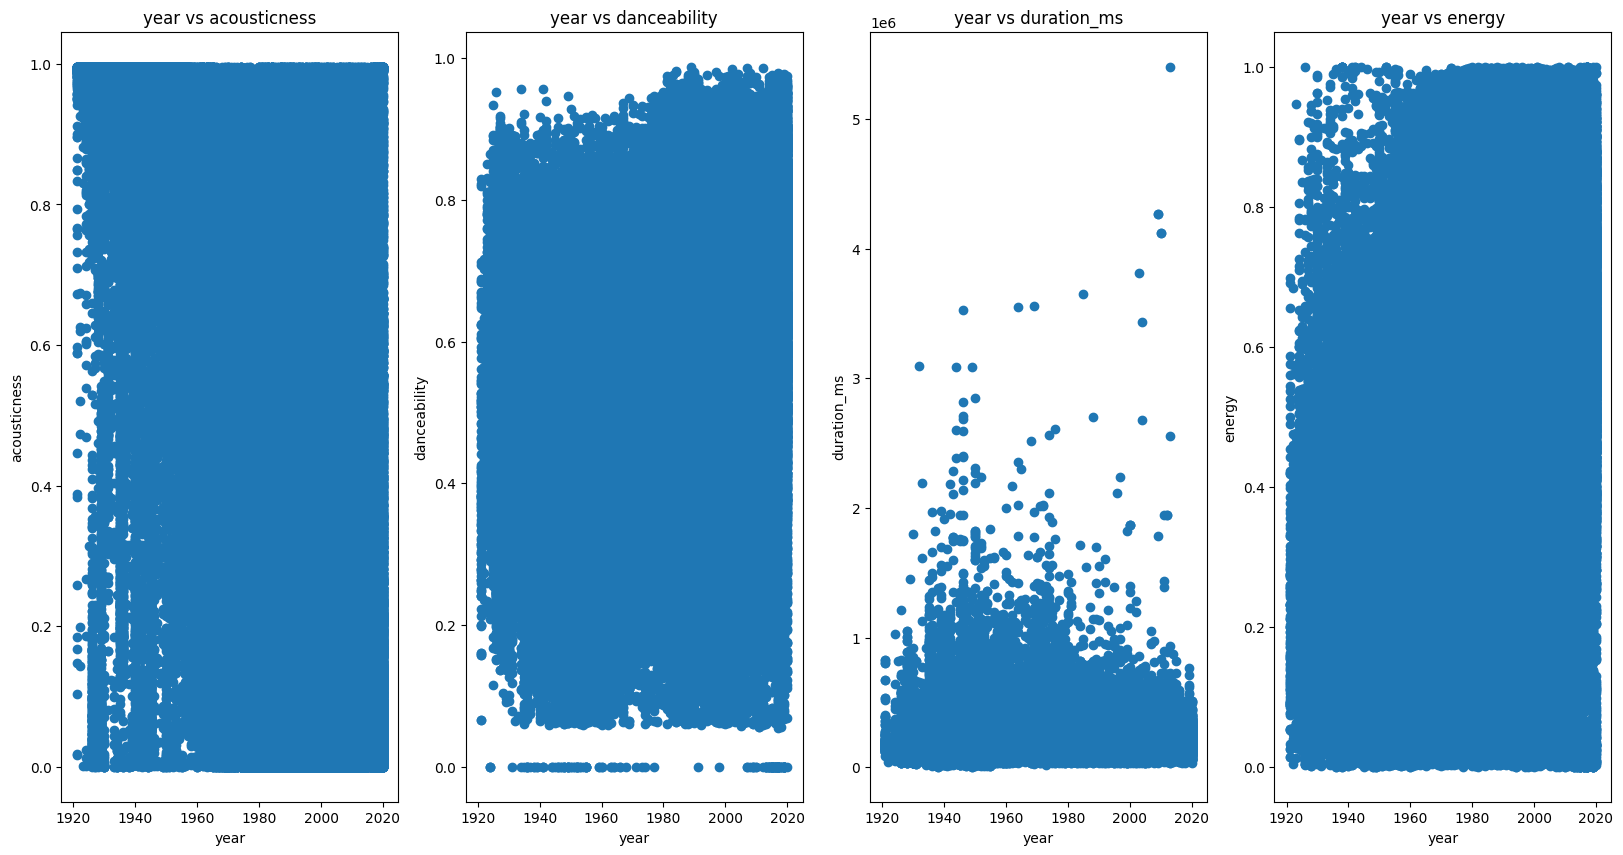

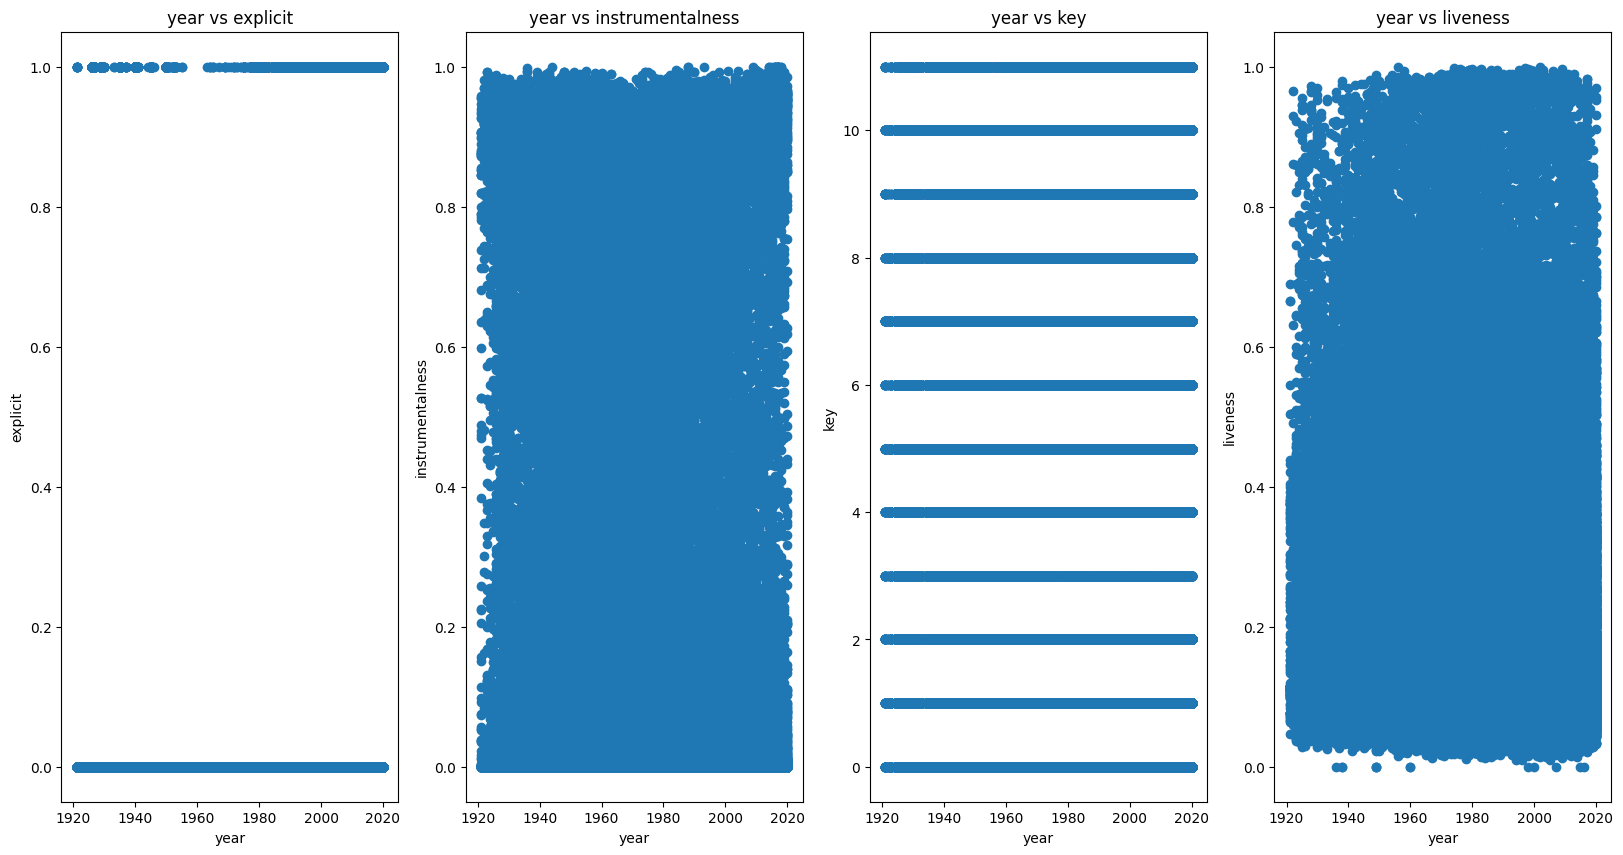

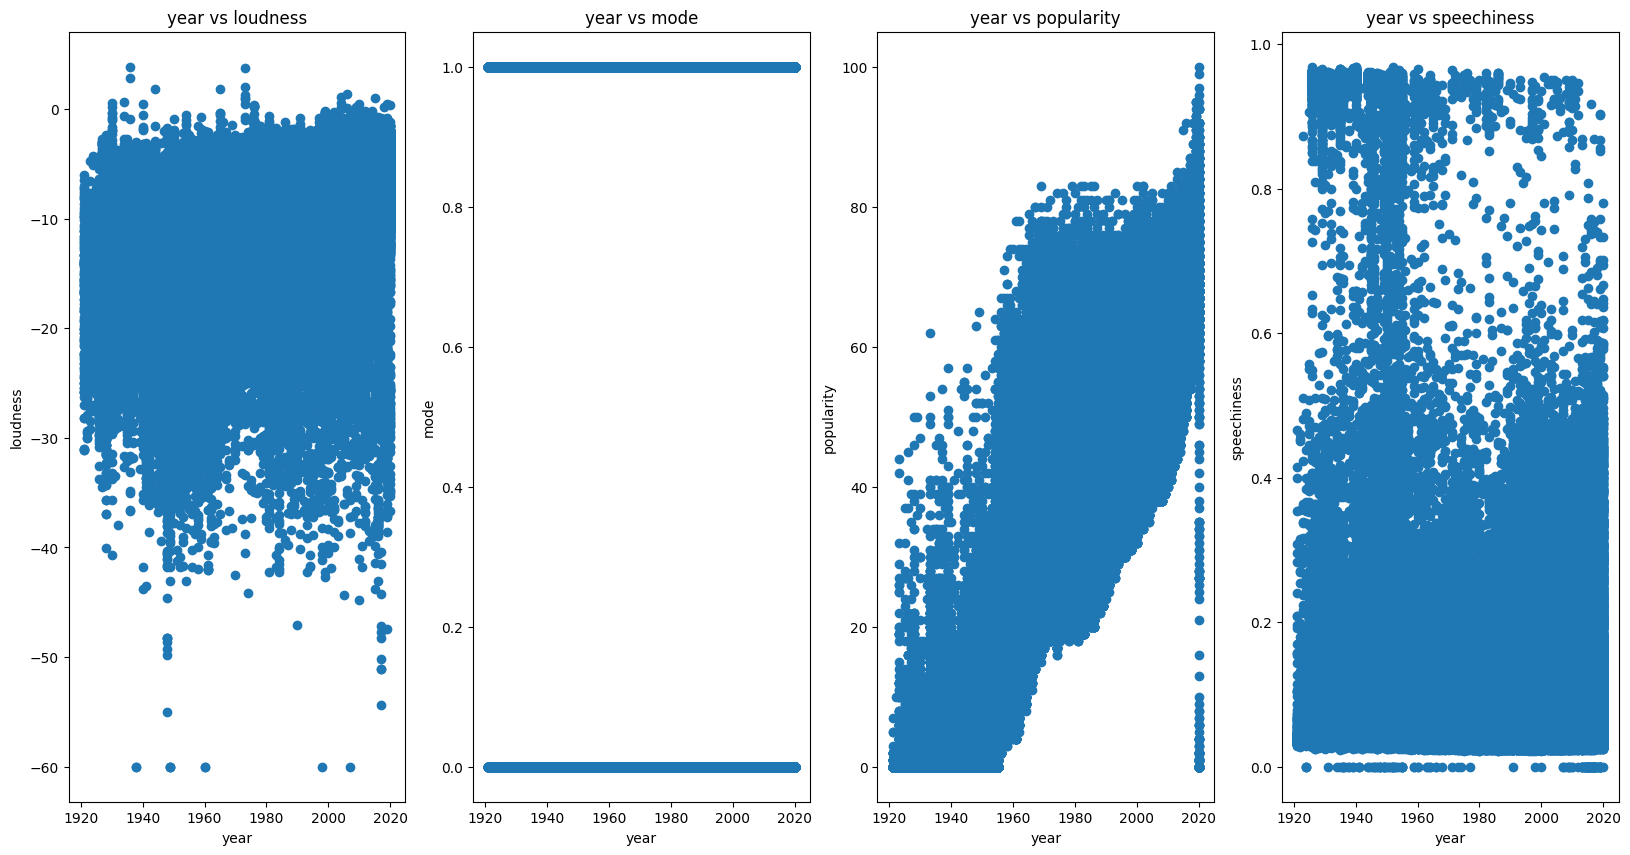

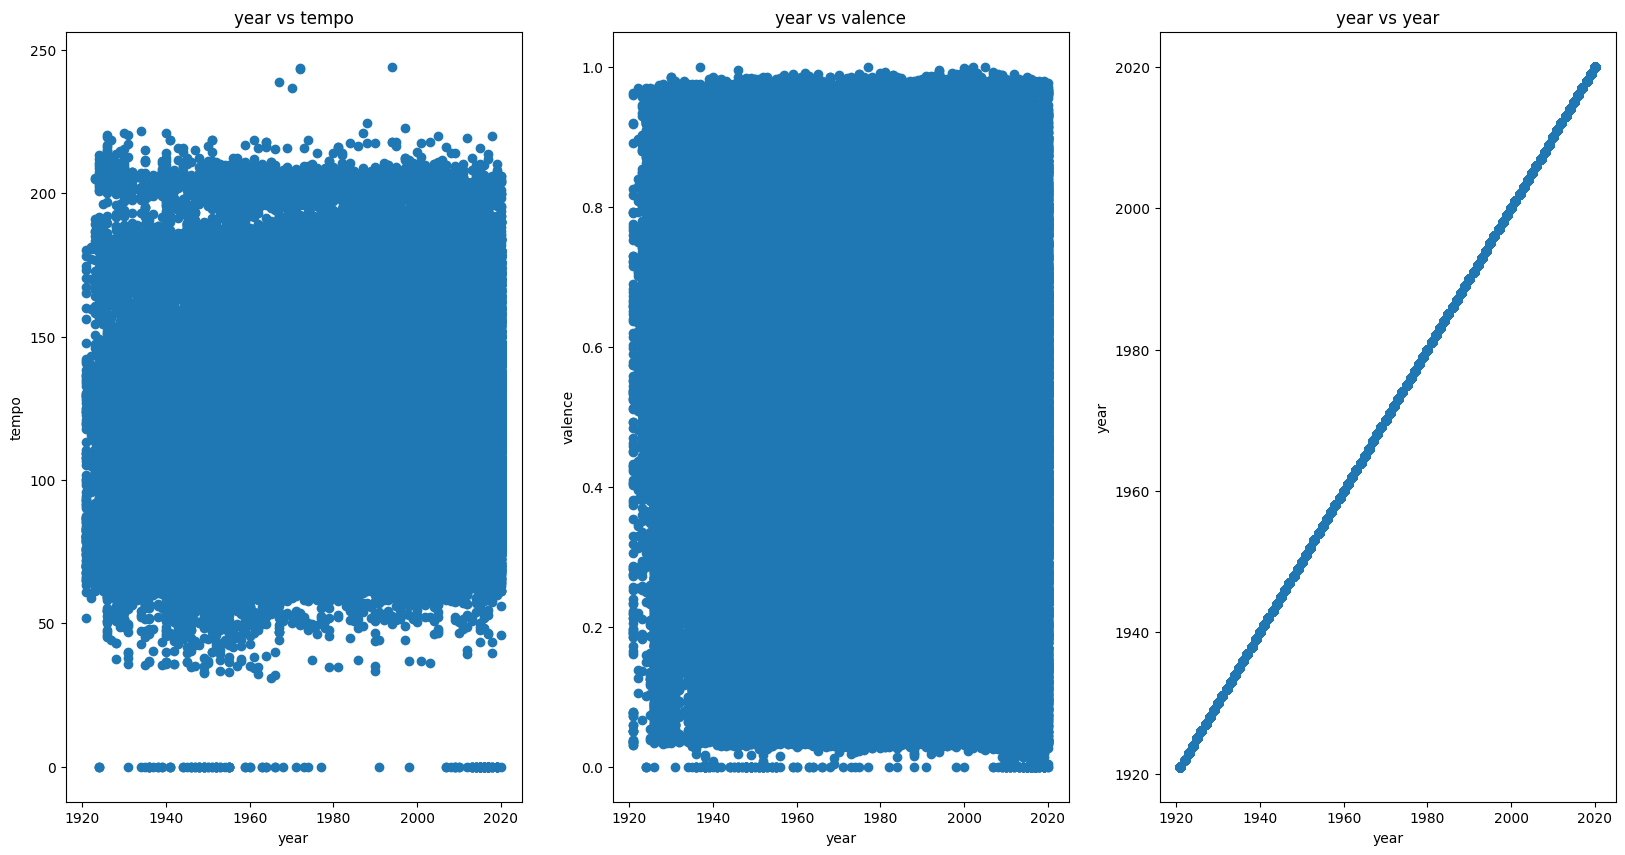

In [70]:
import matplotlib.pyplot as plt

nw_new_interval = df.drop(['artists', 'id', 'name', 'release_date',], axis='columns')
cols = list(nw_new_interval.columns)
for i in range(0, len(cols),4):
    if i+4 > len(cols):
        figure, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(20,10))
        ax1.set_title(f"year vs {cols[i]}")
        ax1.set_ylabel(f'{cols[i]}')
        ax1.set_xlabel(f'year')

        ax2.set_title(f"year vs {cols[i+1]}")
        ax2.set_ylabel(f'{cols[i+1]}')
        ax2.set_xlabel(f'year')

        ax3.set_title(f"year vs {cols[i+2]}")
        ax3.set_ylabel(f'{cols[i+2]}')
        ax3.set_xlabel(f'year')

        ax1.scatter(nw_new_interval['year'], nw_new_interval[cols[i]])
        ax2.scatter(nw_new_interval['year'], nw_new_interval[cols[i+1]])
        ax3.scatter(nw_new_interval['year'], nw_new_interval[cols[i+2]])
        plt.show()
    else:
        figure, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(20,10))
        ax1.set_title(f"year vs {cols[i]}")
        ax1.set_ylabel(f'{cols[i]}')
        ax1.set_xlabel(f'year')

        ax2.set_title(f"year vs {cols[i+1]}")
        ax2.set_ylabel(f'{cols[i+1]}')
        ax2.set_xlabel(f'year')

        ax3.set_title(f"year vs {cols[i+2]}")
        ax3.set_ylabel(f'{cols[i+2]}')
        ax3.set_xlabel(f'year')

        ax4.set_title(f"year vs {cols[i+3]}")
        ax4.set_ylabel(f'{cols[i+3]}')
        ax4.set_xlabel(f'year')

        ax1.scatter(nw_new_interval['year'], nw_new_interval[cols[i]])
        ax2.scatter(nw_new_interval['year'], nw_new_interval[cols[i+1]])
        ax3.scatter(nw_new_interval['year'], nw_new_interval[cols[i+2]])
        ax4.scatter(nw_new_interval['year'], nw_new_interval[cols[i+3]])

    plt.show()


# Multiple Linear Regression to Predict Popularity

import modules

In [81]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
import scikitplot as skplt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


prepare data to used for prediction

In [76]:
df = pd.read_csv('spotify_data.csv')

# get the target column
pop = df['popularity']

# drop columns that are non numeric in nature
lin_df = df.drop(['artists', 'id', 'name', 'release_date','explicit', 'popularity' ], axis='columns')

features = list(lin_df.columns)



### Prerocessing

In [78]:
scaler = StandardScaler()

# take the numerical values

lin_df[features] = scaler.fit_transform(lin_df[features])

lin_df.head()



acousticness  danceability  duration_ms    energy  instrumentalness  \
0      1.332319      0.968662    -0.599713 -1.097999          1.296562   
1      1.329664     -0.907636     0.418119 -1.776785          2.389253   
2      0.294154      1.202486    -1.047680 -1.004503         -0.523513   
3      1.332319      1.384983    -0.417454 -1.341091          2.343994   
4      1.319044     -1.871449     3.761300 -1.064341          2.411883   

        key  liveness  loudness      mode  speechiness     tempo   valence  \
0  1.365333 -0.314998 -0.186652  0.641344    -0.289840  0.049500  0.940924   
1  0.796383 -0.737519 -3.014729  0.641344    -0.319186 -1.073199 -1.735454   
2 -0.057043 -0.495997 -1.509457 -1.559227     5.568626 -0.317996  1.325822   
3 -1.194943 -0.541247 -0.593587 -1.559227    -0.009722 -0.291114  0.716082   
4  1.649808 -0.614778 -0.963288  0.641344    -0.344530 -1.783425 -1.763655   

       year  
0 -1.923301  
1 -1.923301  
2 -1.923301  
3 -1.923301  
4 -1.923301

In [79]:
# separate the data for testing and training
X_train, X_test, y_train, y_test = train_test_split(lin_df, pop, test_size=0.30)

## Build Lasso Regression model

First we <b> find the optimal number of features </b> then we <b> build the model </b>

In [89]:
# cross-validation scheme
cv = KFold(shuffle=True, random_state=1)

# range for the number of features for selection
params = {"n_features_to_select" : list(range(1,13))}

# build model for lasso regression and fit the model on the train data
lasso_model = Lasso()

# grid search
clf = GridSearchCV(
    estimator=RFE(lasso_model),
    param_grid=params,
    cv=cv,
    scoring="r2",
    return_train_score=True
)

clf.fit(X_train, y_train)


GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=RFE(estimator=Lasso()),
             param_grid={'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                                  11, 12]},
             return_train_score=True, scoring='r2')

In [90]:
print(f"Best parameters : {clf.best_params_}")

Best parameters : {'n_features_to_select': 6}


In [85]:
# let us visualize the result
results = pd.DataFrame(clf.cv_results_)
results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.683198      0.140481         0.009002        0.001269   
1        0.533999      0.072249         0.010006        0.001675   
2        0.459800      0.010145         0.007999        0.000631   
3        0.449003      0.037702         0.008997        0.002758   
4        0.410804      0.032958         0.007597        0.001851   
5        0.373194      0.014259         0.009802        0.001469   
6        0.358603      0.013936         0.010203        0.001466   
7        0.328800      0.042718         0.015199        0.009906   
8        0.239800      0.008285         0.008201        0.000756   
9        0.186200      0.008659         0.007202        0.000398   
10       0.145200      0.003761         0.005409        0.000500   
11       0.111313      0.016982         0.006809        0.001161   

   param_n_features_to_select                        params  \
0                           1   {'n_features_to_select': 1}   
1                           2   {'n_features_to_select': 2}   
2                           3   {'n_features_to_select': 3}   
3                           4   {'n_features_to_select': 4}   
4                           5   {'n_features_to_select': 5}   
5                           6   {'n_features_to_select': 6}   
6                           7   {'n_features_to_select': 7}   
7                           8   {'n_features_to_select': 8}   
8                           9   {'n_features_to_select': 9}   
9                          10  {'n_features_to_select': 10}   
10                         11  {'n_features_to_select': 11}   
11                         12  {'n_features_to_select': 12}   

    split0_test_score  split1_test_score  split2_test_score  \
0            0.769933           0.769715           0.774033   
1            0.772560           0.772357           0.776665   
2            0.772760           0.772553           0.776880   
3            0.772760           0.772557           0.776888   
4            0.772760           0.772559           0.776890   
5            0.772760           0.772559           0.776890   
6            0.772760           0.772558           0.776890   
7            0.772760           0.772558           0.776890   
8            0.772760           0.772558           0.776890   
9            0.772760           0.772558           0.776890   
10           0.772760           0.772559           0.776890   
11           0.772760           0.772559           0.776890   

    split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0            0.774758  ...         0.773017        0.002744               12   
1            0.777460  ...         0.775652        0.002736               11   
2            0.777697  ...         0.775866        0.002749               10   
3            0.777697  ...         0.775868        0.002748                9   
4            0.777697  ...         0.775869        0.002748                2   
5            0.777698  ...         0.775869        0.002748                1   
6            0.777698  ...         0.775869        0.002748                3   
7            0.777696  ...         0.775869        0.002748                6   
8            0.777696  ...         0.775869        0.002748                7   
9            0.777696  ...         0.775869        0.002748                7   
10           0.777695  ...         0.775869        0.002748                4   
11           0.777695  ...         0.775869        0.002748                4   

    split0_train_score  split1_train_score  split2_train_score  \
0             0.773824            0.773881            0.772650   
1             0.776458            0.776518            0.775283   
2             0.776646            0.776700            0.775501   
3             0.776647            0.776705            0.775512   
4             0.776647            0.776707            0.775513   
5             0.776647            0.776707

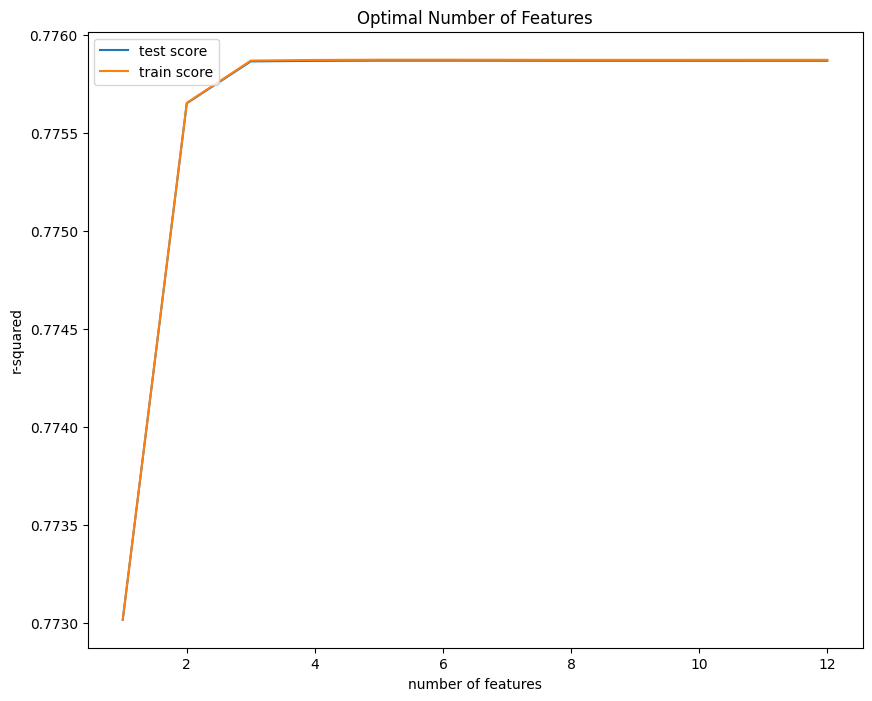

In [86]:
# plotting the results
plt.figure(figsize=(10,8))

plt.plot(results["param_n_features_to_select"], results["mean_test_score"])
plt.plot(results["param_n_features_to_select"], results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')
plt.show()

we see that from 3, the score becomes stable, so we will use 3 features for our model

## Predictions with Lasso Regression 

R-squared: 0.36046492328541035
 Root mean squared error: 17.26414400325837


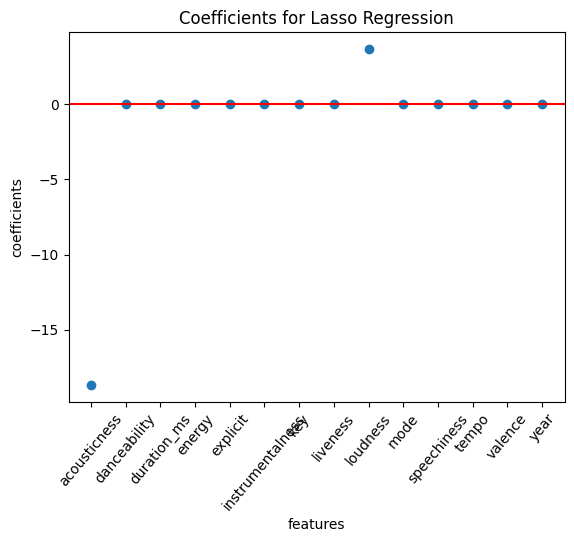

In [16]:
multiple_coefs = lasso_model.coef_ 

# get mse and r squared for predictions on test data
lasso_test_predictions = lasso_model.predict(X_test)
print(f"R-squared: {r2_score(y_test, lasso_test_predictions)}")
print(f"Root mean squared error: {np.sqrt(mean_squared_error(y_test,lasso_test_predictions))}")

# Plotting
plt.scatter(range(len(multiple_coefs)), multiple_coefs)
plt.axhline(0, color='r', linestyle='solid')
plt.xticks(range(len(feature_names)),feature_names,rotation=50)
plt.title("Coefficients for Lasso Regression")
plt.ylabel("coefficients")
plt.xlabel("features")
plt.show()


From the above graph, we denote that only the features acousticness and loudness have an impact on the ppopularity, with acousticness having a higher impact since it has a much higher coefficient score loudness. But even with this effect the featues had, the model built did not have a sufficient enough score for accuracy, with its r-squared at 0.36.


## Build Ridge Regression model

In [17]:
# cross-validation scheme
cv = KFold(shuffle=True, random_state=1)

# range for the number of features for selection
params = {"n_features_to_select" : list(range(1,13))}

# build model for ridge regression
ridge_model = Ridge()

# grid search
clf = GridSearchCV(
    estimator=RFE(ridge_model),
    param_grid=params,
    cv=cv,
    scoring="r2",
    return_train_score=True
)

clf.fit(X_train, y_train)



## Predictions with Ridge Regression 

R-squared: 0.781570202937127
Root mean squared error: 10.08948052463319


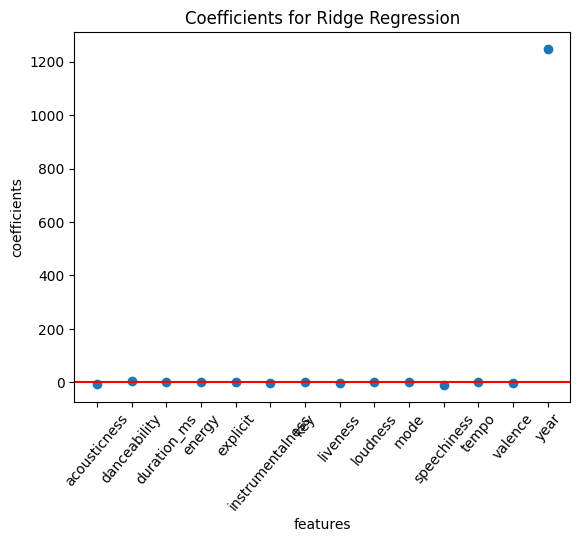

In [18]:
multiple_coefs = ridge_model.coef_ 

# get mse and r squared for predictions on train data
ridge_test_predictions = ridge_model.predict(X_test)
print(f"R-squared: {r2_score(y_test, ridge_test_predictions)}")
print(f"Root mean squared error: {np.sqrt(mean_squared_error(y_test,ridge_test_predictions))}")

# Plotting
plt.scatter(range(len(multiple_coefs)), multiple_coefs)
plt.axhline(0, color='r', linestyle='solid')
plt.xticks(range(len(feature_names)),feature_names,rotation=50)
plt.title("Coefficients for Ridge Regression")
plt.ylabel("coefficients")
plt.xlabel("features")
plt.show()

From the above graph, we denote that the only the feature year  has an impact on popularity when l2 normaization is applied, and not only does the year have an impact, but the impact is very high, and this shows as we have the R-squared as 0.78.


## Build Elasticnet model

In [91]:
# cross-validation scheme
cv = KFold(shuffle=True, random_state=1)

# range for the number of features for selection
params = {"n_features_to_select" : list(range(1,13))}

# build model and fit model to data
elastic_model = ElasticNet()

# grid search
clf = GridSearchCV(
    estimator=RFE(elastic_model),
    param_grid=params,
    cv=cv,
    scoring="r2",
    return_train_score=True
)

clf.fit(X_train, y_train)


NameError: name 'ridge_model' is not defined

## Predictions with Elasticnet

R-squared: 0.26090050567540446
Root mean squared error: 18.55941648849681


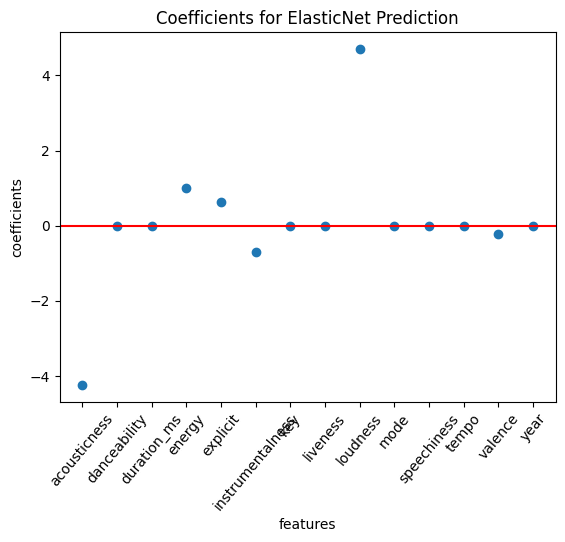

In [21]:
multiple_coefs = elastic_model.coef_ 

# get mse and r squared for predictions on test data
elastic_test_predictions = elastic_model.predict(X_test)
print(f"R-squared: {r2_score(y_test, elastic_test_predictions)}")
print(f"Root mean squared error: {np.sqrt(mean_squared_error(y_test,elastic_test_predictions))}")

# Plotting
plt.scatter(range(len(multiple_coefs)), multiple_coefs)
plt.axhline(0, color='r', linestyle='solid')
plt.xticks(range(len(feature_names)),feature_names,rotation=50)
plt.title("Coefficients for ElasticNet Prediction")
plt.ylabel("coefficients")
plt.xlabel("features")
plt.show()